# Lending Club Case Study
-by Tanushree Dharpure

#### This case study includes basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers.

When the company receives a loan application, the company has to make a decision for loan approval based on the 
applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. 

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking 
actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

##### Let's analyse the dataset provided with univariate, bivariate analysis including visualisations and summarisation of the most important results.


In [1381]:
#let's first import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regular expressions for string manipulation
import re

In [1382]:
#read csv file
loan =  pd.read_csv('../loan.csv') 

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/1757138694.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan =  pd.read_csv('/Users/Tanushree.Dharpure/Downloads/loan.csv')


Lets collect all basic information of Dataset

In [1383]:
#get shape and other basic info of loan dataset
print(loan.shape)
print(loan.info())
print(loan.head())
print(loan.columns)
print(loan.describe())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...    

loan has 39717 rows and 111 columns

##### As we have collected all basic info lets move to the next step which is DATA CLEANING

In [1384]:
#columnwise count of null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [1385]:
#firstly drop all the columns with more than 90% of null values
total_rows=len(loan)
thresh=int(total_rows/100*90)
mis_columns = loan.columns[loan.isnull().sum()>thresh]
loan = loan.drop(mis_columns,axis=1)
loan.shape

(39717, 55)

#### Observation:
#### Now total rows are 39717 and total columns are 55

In [1386]:
#columnwise count of null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [1387]:
#now lets focus on rows having null values
loan.isnull().sum(axis=1)

0        2
1        1
2        3
3        0
4        0
        ..
39712    4
39713    4
39714    6
39715    6
39716    4
Length: 39717, dtype: int64

In [1388]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.

columns_drop_list = ["application_type","policy_code","initial_list_status","installment","pymnt_plan","mths_since_last_delinq","desc","member_id","emp_title","url","zip_code","tax_liens",'delinq_amnt','chargeoff_within_12_mths','acc_now_delinq']
loan.drop(labels = columns_drop_list, axis =1, inplace=True)
print(loan.shape)
loan.isnull().sum()

(39717, 40)


id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
out_prncp                        0
out_prncp_inv                    0
total_pymnt         

In [1389]:
#drop rows with more than 10% of null values
total_columns=len(loan.columns)
thresh=int(total_columns/100*10)
loan=loan.drop(loan[loan.isnull().sum(axis=1)>thresh].index,axis=0)
loan.shape

(39717, 40)

#### Observation:
#### Now final count of rows are 39717 and coluns are 40

In [1390]:
loan.isnull().sum(axis=1)


0        0
1        0
2        0
3        0
4        0
        ..
39712    2
39713    2
39714    2
39715    2
39716    2
Length: 39717, dtype: int64

In [1391]:
#get description of dataset
loan.describe()

id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  3.971700e+04  39717.000000  39717.000000     39717.000000   
mean   6.831319e+05  11219.443815  10947.713196     10397.448868   
std    2.106941e+05   7456.670694   7187.238670      7128.450439   
min    5.473400e+04    500.000000    500.000000         0.000000   
25%    5.162210e+05   5500.000000   5400.000000      5000.000000   
50%    6.656650e+05  10000.000000   9600.000000      8975.000000   
75%    8.377550e+05  15000.000000  15000.000000     14400.000000   
max    1.077501e+06  35000.000000  35000.000000     35000.000000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  3.971700e+04  39717.000000  39717.000000    39717.000000  39717.000000   
mean   6.896893e+04     13.315130      0.146512        0.869200      9.294408   
std    6.379377e+04      6.678594      0.491812        1.070219      4.400282   
min    4.000000e+03      0.000000      0.000000        0.000000      2.000000   
25%    4.040400e+04      8.170000      0.000000        0.000000      6.000000   
50%    5.900000e+04     13.400000      0.000000        1.000000      9.000000   
75%    8.230000e+04     18.600000      0.000000        1.000000     12.000000   
max    6.000000e+06     29.990000     11.000000        8.000000     44.000000   

            pub_rec  ...   total_pymnt  total_pymnt_inv  total_rec_prncp  \
count  39717.000000  ...  39717.000000     39717.000000     39717.000000   
mean       0.055065  ...  12153.596544     11567.149118      9793.348813   
std        0.237200  ...   9042.040766      8942.672613      7065.522127   
min        0.000000  ...      0.000000         0.000000         0.000000   
25%        0.000000  ...   5576.930000      5112.310000      4600.000000   
50%        0.000000  ...   9899.640319      9287.150000      8000.000000   
75%        0.000000  ...  16534.433040     15798.810000     13653.260000   
max        4.000000  ...  58563.679930     58563.680000     35000.020000   

       total_rec_int  total_rec_late_fee    recoveries  \
count   39717.000000        39717.000000  39717.000000   
mean     2263.663172            1.363015     95.221624   
std      2608.111964            7.289979    688.744771   
min         0.000000            0.000000      0.000000   
25%       662.180000            0.000000      0.000000   
50%      1348.910000            0.000000      0.000000   
75%      2833.400000            0.000000      0.000000   
max     23563.680000          180.200000  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count             39717.000000     39717.000000                     39661.0   
mean                 12.406112      2678.826162                         0.0   
std                 148.671593      4447.136012                         0.0   
min                   0.000000         0.000000                         0.0   
25%                   0.000000       218.680000                         0.0   
50%                   0.000000       546.140000                         0.0   
75%                   0.000000      3293.160000                         0.0   
max                7002.190000     36115.200000                         0.0   

       pub_rec_bankruptcies  
count          39020.000000  
mean               0.043260  
std                0.204324  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                2.000000  

[8 rows x 24 columns]

In [1392]:
#print top 5 rows of loan dataset
loan.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

  grade sub_grade emp_length home_ownership  ...  total_rec_prncp  \
0     B        B2  10+ years           RENT  ...          5000.00   
1     C        C4   < 1 year           RENT  ...           456.46   
2     C        C5  10+ years           RENT  ...          2400.00   
3     C        C1  10+ years           RENT  ...         10000.00   
4     B        B5     1 year           RENT  ...          2475.94   

  total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16               0.00       0.00                    0.00   
1        435.17               0.00     117.08                    1.11   
2        605.67               0.00       0.00                    0.00   
3       2214.92              16.97       0.00                    0.00   
4       1037.39               0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt  last_credit_pull_d  \
0       Jan-15          171.62              May-16   
1       Apr-13          119.66              Sep-13   
2       Jun-14          649.91              May-16   
3       Jan-15          357.48              Apr-16   
4       May-16           67.79              May-16   

   collections_12_mths_ex_med pub_rec_bankruptcies  
0                         0.0                  0.0  
1                         0.0                  0.0  
2                         0.0                  0.0  
3                         0.0                  0.0  
4                         0.0                  0.0  

[5 rows x 40 columns]

#### Now Standardise values 

In [1393]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [1394]:
#term : The number of payments on the loan. Values are in months and can be either 36 or 60.
loan['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [1395]:
loan['term'].isnull().sum()

0

In [1396]:
#term can be converted to int value which in string now
loan['term']=loan['term'].apply(lambda x: pd.to_numeric(x.split()[0]))

In [1397]:
loan['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [1398]:
#int_rate:Interest Rate on the loan
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [1399]:
loan['int_rate'].isnull().sum()

0

In [1400]:
#term can be converted to int value which in string now
loan['int_rate']=loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [1401]:
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [1402]:
#emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [1403]:
loan['emp_length'].isnull().sum()

1075

In [1404]:
#remove rows which has emp_length as null
loan=loan[~loan['emp_length'].isnull()]

In [1405]:
loan['emp_length'].isnull().sum()

0

In [1406]:
#with regular expression extract numeric value from string
loan['emp_length']=loan['emp_length'].apply(lambda x: re.findall(r'\d+',str(x))[0])

In [1407]:
print(loan['emp_length'])
print(loan.iloc[2])

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: object
id                                         1077175
loan_amnt                                     2400
funded_amnt                                   2400
funded_amnt_inv                             2400.0
term                                            36
int_rate                                     15.96
grade                                            C
sub_grade                                       C5
emp_length                                      10
home_ownership                                RENT
annual_inc                                 12252.0
verification_status                   Not Verified
issue_d                                     Dec-11
loan_status                             Fully Paid
purpose                             small_business
title                         real estate business
addr_

In [1408]:
# pub_rec_bankruptcies can be cleaned for further analysis.
print("Before cleaning:")
print(loan.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [1409]:
#remove rows which has null value
loan=loan[~loan['last_credit_pull_d'].isnull()]
loan=loan[~loan['last_pymnt_d'].isnull()]
loan=loan[~loan['revol_util'].isnull()]

In [1410]:
#Standardise all the reguired fields
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['revol_util']=loan['revol_util'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [1411]:
print(loan.iloc[2])
print(loan.info())
print(loan.shape)
print(loan.head())
print(loan.describe())
print(loan.columns)

id                                         1077175
loan_amnt                                     2400
funded_amnt                                   2400
funded_amnt_inv                             2400.0
term                                            36
int_rate                                     15.96
grade                                            C
sub_grade                                       C5
emp_length                                      10
home_ownership                                RENT
annual_inc                                 12252.0
verification_status                   Not Verified
issue_d                        2011-12-01 00:00:00
loan_status                             Fully Paid
purpose                             small_business
title                         real estate business
addr_state                                      IL
dti                                           8.72
delinq_2yrs                                      0
earliest_cr_line               

#### After Filtering and Standardising all the columns we have 38527 rows and 55 columns to analyse

### Analysing data : Univariate Analysis

In [1412]:
print(loan['term'].value_counts())
print(loan['grade'].value_counts())
print(loan['sub_grade'].value_counts())
print(loan['emp_length'].value_counts())
print(loan['home_ownership'].value_counts())
print(loan['loan_status'].value_counts())
print(loan['verification_status'].value_counts())
print(loan['purpose'].value_counts())

36    28194
60    10337
Name: term, dtype: int64
B    11672
A     9688
C     7892
D     5166
E     2777
F     1025
G      311
Name: grade, dtype: int64
B3    2833
A4    2803
A5    2654
B5    2644
B4    2454
C1    2087
B2    1990
C2    1968
B1    1751
A3    1740
C3    1488
A2    1440
D2    1311
C4    1201
C5    1148
D3    1140
A1    1051
D4     958
D1     908
D5     849
E1     750
E2     639
E3     535
E4     448
E5     405
F1     324
F2     242
F3     182
F4     162
F5     115
G1     100
G2      77
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64
10    8869
1     7788
2     4377
3     4084
4     3422
5     3268
6     2225
7     1769
8     1474
9     1255
Name: emp_length, dtype: int64
RENT        18410
MORTGAGE    17189
OWN          2833
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Fully Paid     32112
Charged Off     5321
Current         1098
Name: loan_status, dtype: int64
Not Verified       16436
Verified           12328
Source Verified     97

<Axes: xlabel='verification_status', ylabel='count'>

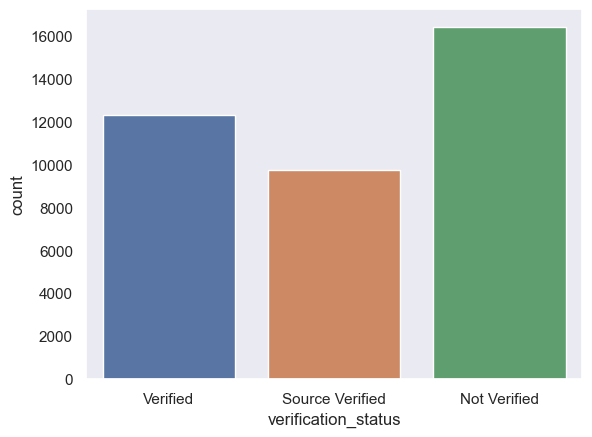

In [1413]:
sns.countplot(x=loan['verification_status'])

<Axes: xlabel='loan_status', ylabel='count'>

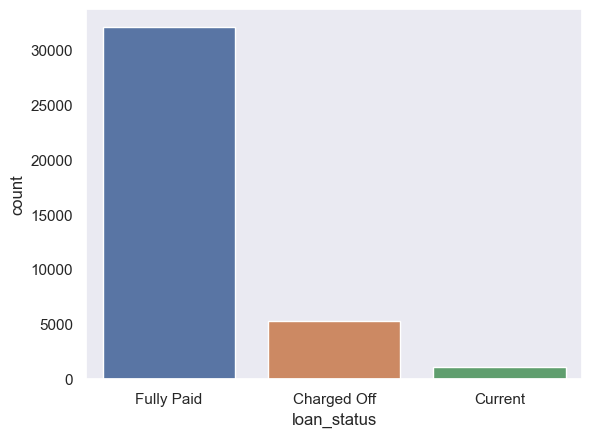

In [1414]:
sns.countplot(x=loan['loan_status'])

In [1415]:
# Lets take a look on important variable loan status in total loans issued

(loan.loan_status.value_counts()*100)/len(loan)

# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

Fully Paid     83.340687
Charged Off    13.809660
Current         2.849654
Name: loan_status, dtype: float64

In [1416]:
# Lets take a look on important variable purpose of loan in total loans issued

(loan.purpose.value_counts()*100)/len(loan)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

debt_consolidation    47.245075
credit_card           12.966183
other                  9.893333
home_improvement       7.456334
major_purchase         5.460538
small_business         4.604085
car                    3.879993
wedding                2.405855
medical                1.728478
moving                 1.445589
house                  0.949885
vacation               0.910955
educational            0.809738
renewable_energy       0.243959
Name: purpose, dtype: float64

### As we have analyse weather person will pay full loan or charge off. Lets remove the rows with loan_status as current.

In [1417]:
loan = loan[loan['loan_status']!='Current']

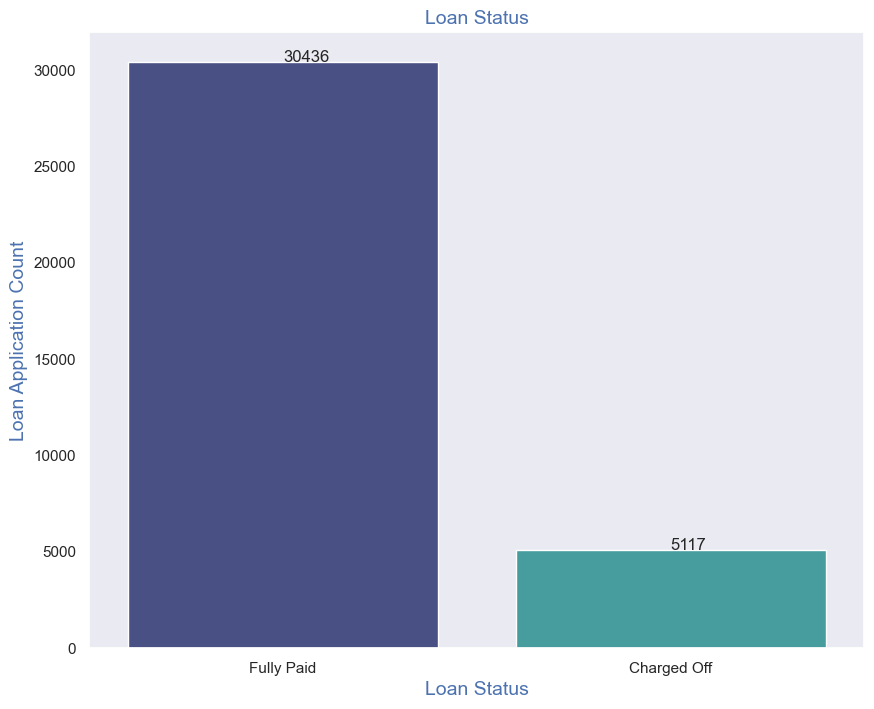

In [1472]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8))
ax = sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='b')
ax.set_xlabel('Loan Status',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status)

#### Observations :
1. Above plot shows that close to 14% loans were charged off out of total loan issued.

In [1419]:
# Basic statistics with .describe() - Quantitative Variables
loan['loan_amnt'].describe()

count    37433.000000
mean     11131.332648
std       7352.376591
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

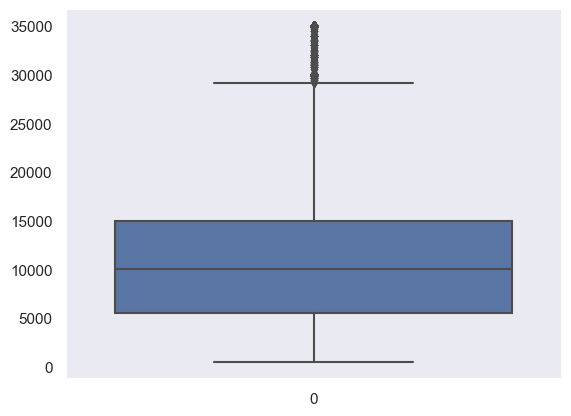

In [1420]:
sns.boxplot(loan['loan_amnt'])

In [1421]:
# Basic statistics with .describe() -Quantitative Variables
loan['total_pymnt'].describe()

count    37433.000000
mean     11985.633298
std       8819.368109
min         33.730000
25%       5581.772363
50%       9811.445233
75%      16272.119970
max      58563.679930
Name: total_pymnt, dtype: float64

<Axes: >

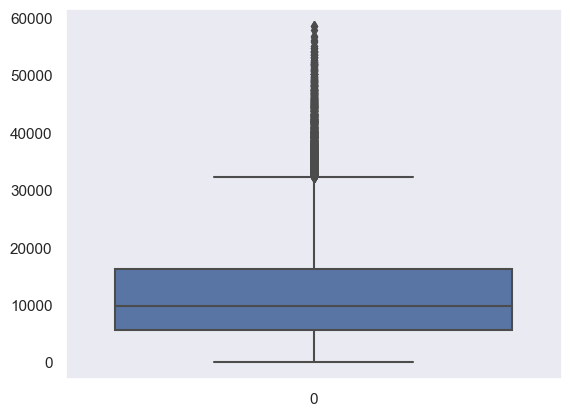

In [1422]:
sns.boxplot(loan['total_pymnt'])

In [1423]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(loan['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .95 from Annual Income
# it will make it easier to visualize the plots.

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.95)]

print('After Removal of Outliers :')
print(loan["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before Removal of Outliers :

count    3.743300e+04
mean     6.946732e+04
std      6.471331e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     35553.000000
mean      61480.510781
std       27725.578708
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64


<Axes: >

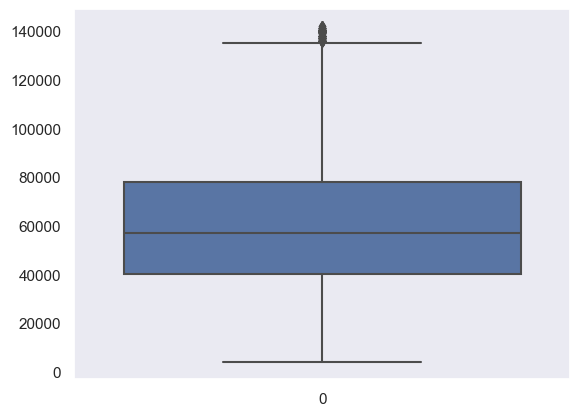

In [1424]:
sns.boxplot(loan.annual_inc)

In [1425]:
# Basic statistics with .describe() -Quantitative Variables

loan['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate zoom'ed to 25% from 15%.

count    35553.000000
mean        11.910961
std          3.657123
min          5.420000
25%          8.940000
50%         11.710000
75%         14.300000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

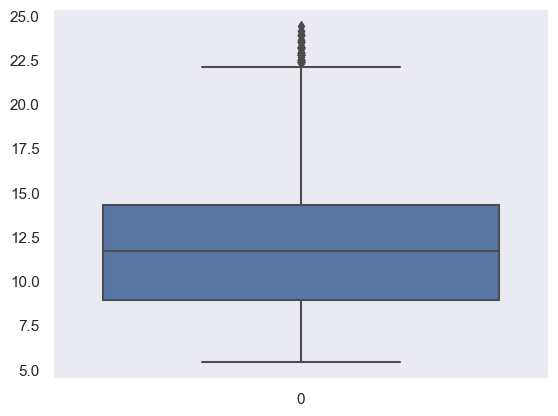

In [1426]:
sns.boxplot(loan.int_rate)

### Correlation Matrix :

In [1427]:
#lets print correlation metrics
columns_drop_list4 =['out_prncp','out_prncp_inv','collections_12_mths_ex_med']
loan.drop(labels = columns_drop_list4, axis =1, inplace=True)
loan.corr()

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/3384693984.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan.corr()


id  loan_amnt  funded_amnt  funded_amnt_inv  \
id                       1.000000   0.119598     0.130496         0.233748   
loan_amnt                0.119598   1.000000     0.981697         0.935883   
funded_amnt              0.130496   0.981697     1.000000         0.954108   
funded_amnt_inv          0.233748   0.935883     0.954108         1.000000   
term                     0.176501   0.348082     0.326998         0.347352   
int_rate                 0.054915   0.290699     0.295837         0.289125   
annual_inc               0.038894   0.397911     0.393545         0.377372   
dti                      0.092796   0.089619     0.088965         0.096834   
delinq_2yrs             -0.007981  -0.038889    -0.038650        -0.045171   
inq_last_6mths          -0.042706   0.001752     0.002458        -0.012213   
open_acc                 0.017024   0.161485     0.159616         0.147023   
pub_rec                 -0.017829  -0.039757    -0.040348        -0.042551   
revol_bal                0.002877   0.311665     0.304001         0.284423   
revol_util               0.094234   0.069780     0.074288         0.079374   
total_acc                0.036784   0.236763     0.231452         0.224208   
total_pymnt              0.107096   0.877799     0.894842         0.869078   
total_pymnt_inv          0.194222   0.841932     0.858958         0.905420   
total_rec_prncp          0.089265   0.839935     0.858198         0.831128   
total_rec_int            0.120485   0.726948     0.735571         0.723805   
total_rec_late_fee      -0.061623   0.042493     0.044874         0.024127   
recoveries               0.041941   0.145036     0.146983         0.134702   
collection_recovery_fee -0.008330   0.074817     0.076961         0.062644   
last_pymnt_amnt          0.144180   0.468880     0.473827         0.465513   

                             term  int_rate  annual_inc       dti  \
id                       0.176501  0.054915    0.038894  0.092796   
loan_amnt                0.348082  0.290699    0.397911  0.089619   
funded_amnt              0.326998  0.295837    0.393545  0.088965   
funded_amnt_inv          0.347352  0.289125    0.377372  0.096834   
term                     1.000000  0.436744    0.078837  0.080793   
int_rate                 0.436744  1.000000    0.050189  0.114121   
annual_inc               0.078837  0.050189    1.000000 -0.078562   
dti                      0.080793  0.114121   -0.078562  1.000000   
delinq_2yrs              0.006082  0.155290    0.029968 -0.033186   
inq_last_6mths           0.045968  0.132849    0.031635  0.005932   
open_acc                 0.042391 -0.004562    0.259783  0.299901   
pub_rec                  0.015355  0.104399   -0.002035 -0.006937   
revol_bal                0.071775  0.083485    0.397961  0.270996   
revol_util               0.064265  0.468820    0.043088  0.277402   
total_acc                0.091182 -0.061312    0.385457  0.246237   
total_pymnt              0.305081  0.281714    0.376595  0.085779   
total_pymnt_inv          0.321614  0.276208    0.362911  0.092037   
total_rec_prncp          0.198061  0.164259    0.377379  0.063626   
total_rec_int            0.509888  0.518515    0.268044  0.121662   
total_rec_late_fee       0.013274  0.090843    0.001659 -0.011212   
recoveries               0.112989  0.127232    0.041572  0.026472   
collection_recovery_fee  0.037320  0.067562    0.021550  0.010305   
last_pymnt_amnt          0.269821  0.166220    0.217974  0.025260   

                         delinq_2yrs  inq_last_6mths  ...  revol_util  \
id                         -0.007981       -0.042706  ...    0.094234   
loan_amnt                  -0.038889        0.001752  ...    0.069780   
funded_amnt                -0.038650        0.002458  ...    0.074288   
funded_amnt_inv            -0.045171       -0.012213  ...    0.079374   
term                        0.006082        0.045968  ...    0.064265   
int_rate                    0.155290        0.132849  ...    0.

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/569068358.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_correlation = loan.corr()


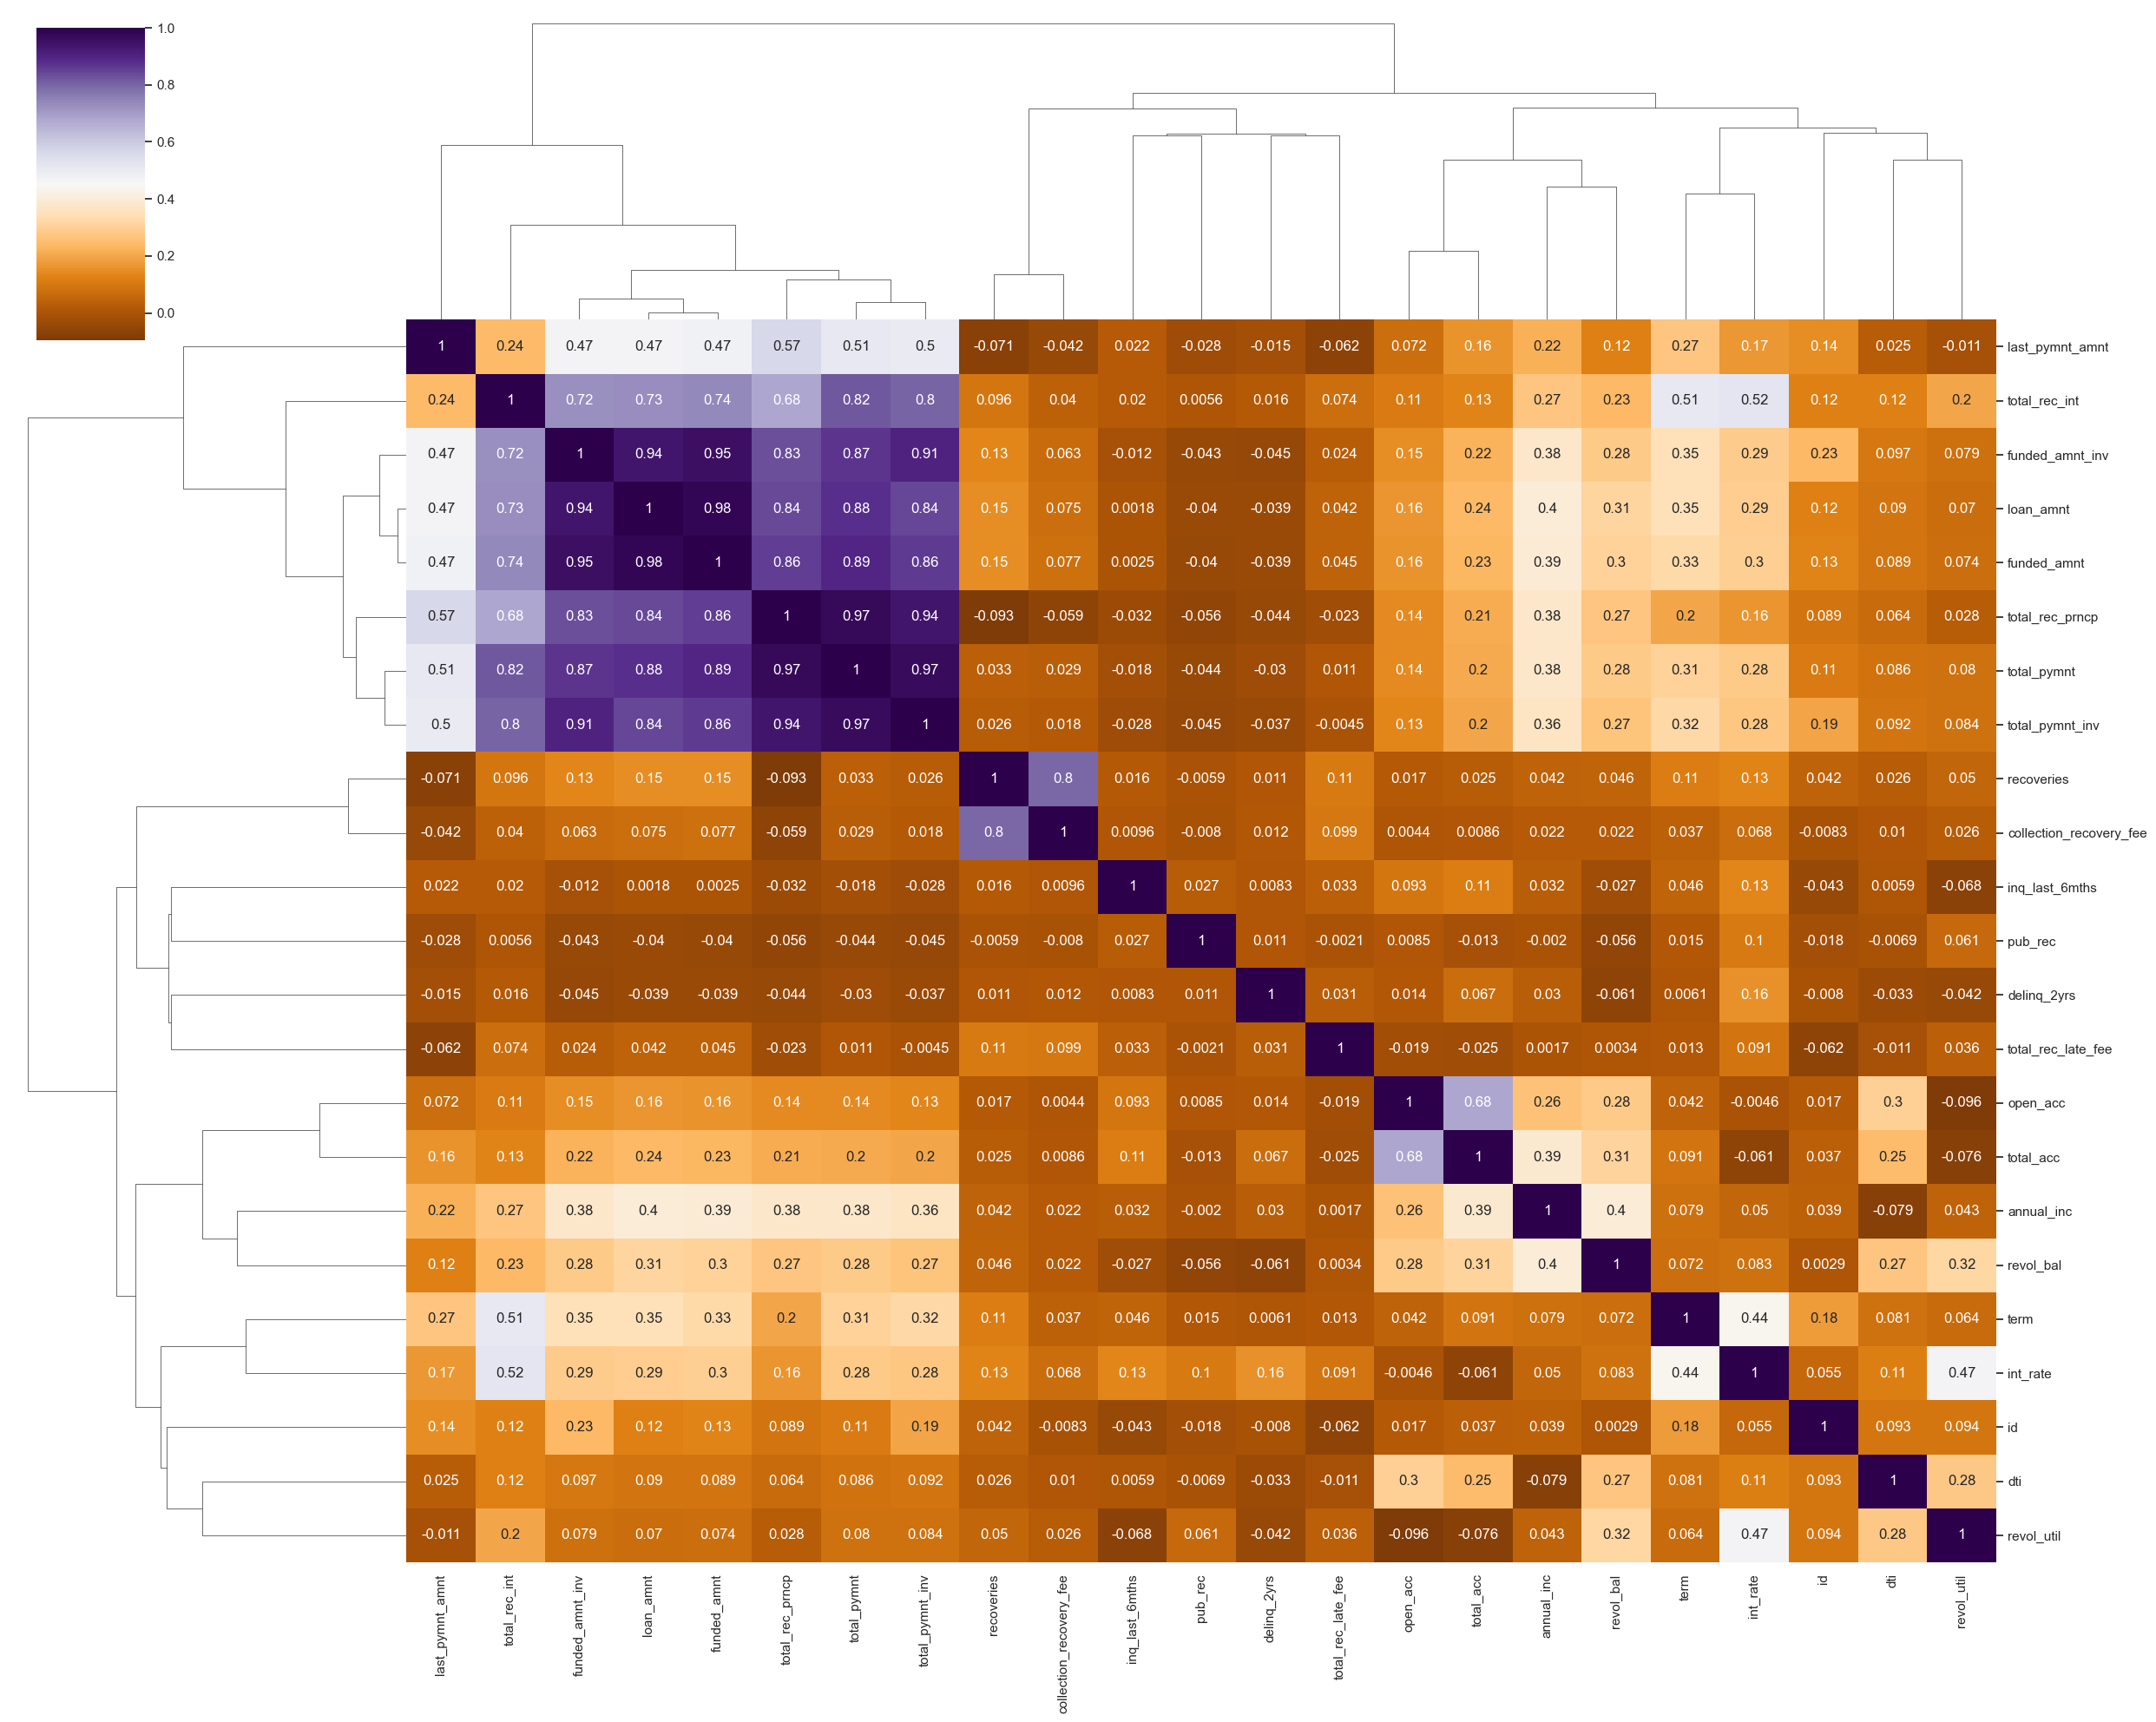

In [1428]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables

loan_correlation = loan.corr()
sns.clustermap(loan_correlation,annot=True,figsize=(25, 20),cmap="PuOr")
plt.show()


#### Observation :
1. Loan amount, investor amount, funding amount are strongly correlated.
2. Annual income with DTI(Debt-to-income ratio) is negatively correalted.
3. Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
4. That means when annual income is low DTI is high & vice versa.
5. positive correlation between annual income and employment years.
6. That means income increases with work experience.

In [1429]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [1430]:
# Lets take a look on shape and data
print(loan.shape)
loan.head(1)
# Observation is we have created extra 5 columns after dropping many.

(35553, 41)


id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  \
0  1077501       5000         5000           4975.0    36     10.65     B   

  sub_grade emp_length home_ownership  ...  recoveries  \
0        B2         10           RENT  ...         0.0   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                     0.0   2015-01-01          171.62         2016-05-01   

  pub_rec_bankruptcies loan_amnt_cats  annual_inc_cats  int_rate_cats dti_cats  
0                  0.0         0-7000      20000-40000          10-13      NaN  

[1 rows x 41 columns]

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/4211223556.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['loan_amnt'])
/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/4211223556.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['funde

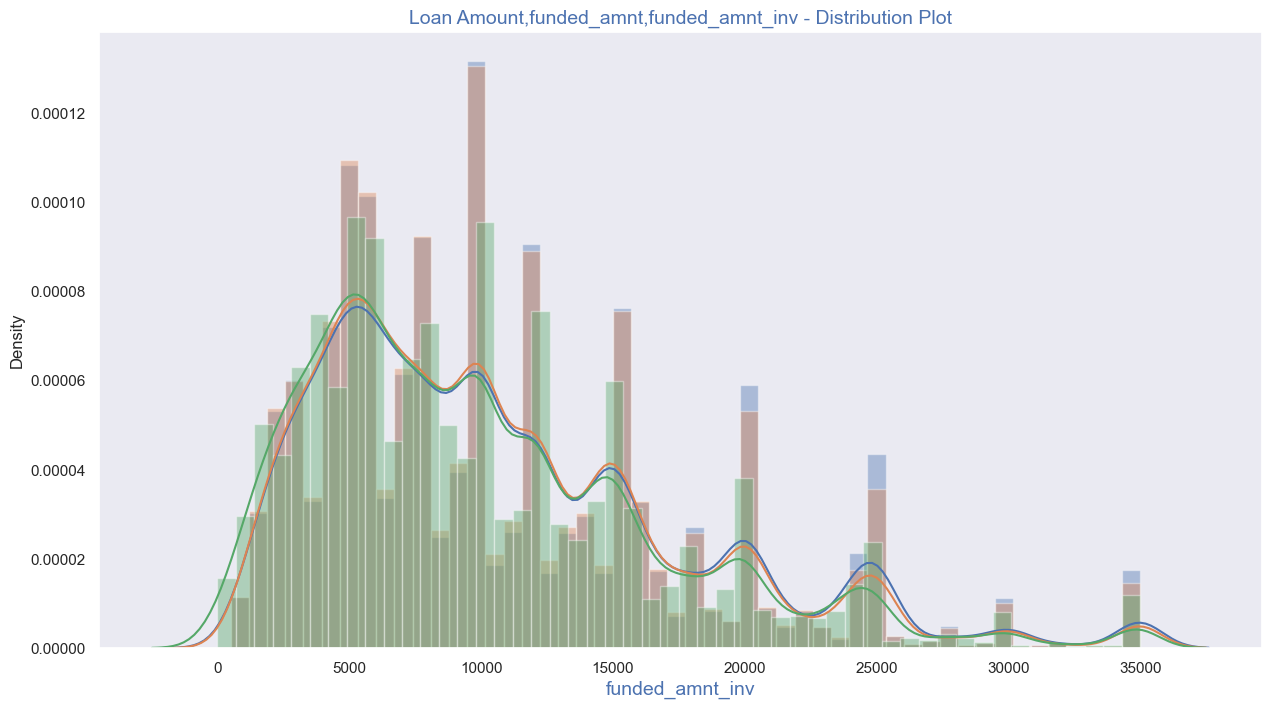

In [1431]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8))
ax = sns.distplot(loan['loan_amnt'])
ax.set_title('Loan Amount,funded_amnt,funded_amnt_inv - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount,funded_amnt,funded_amnt_inv',fontsize=14,color='b')
ax = sns.distplot(loan['funded_amnt'])
ax = sns.distplot(loan['funded_amnt_inv'])
plt.show()

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/2214820330.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['loan_amnt'])


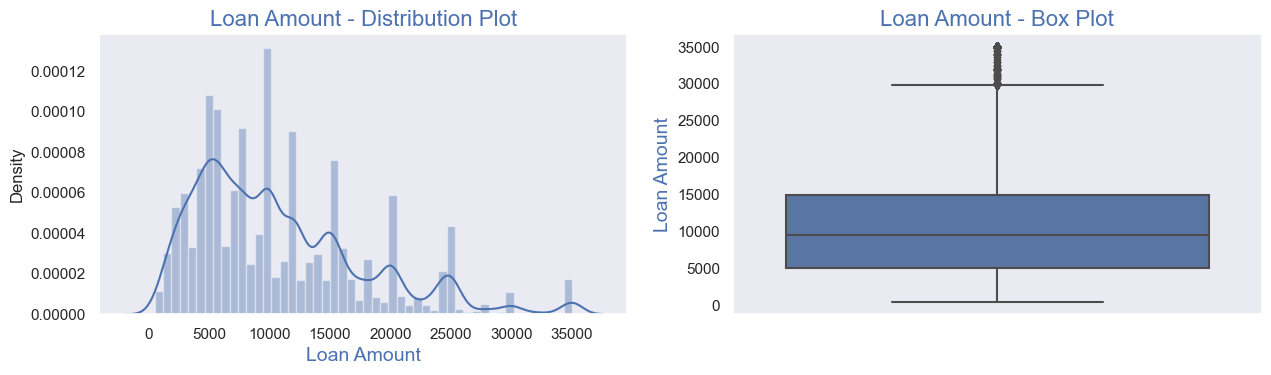

In [1432]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'])
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Loan Amount',fontsize=14,color='b')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000


#### Observation: 
1. Distribution of amounts for all three looks very much similar.
2. We will work with only loan amount column for rest of our analysis.

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/3134145242.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['int_rate'],rug = True)


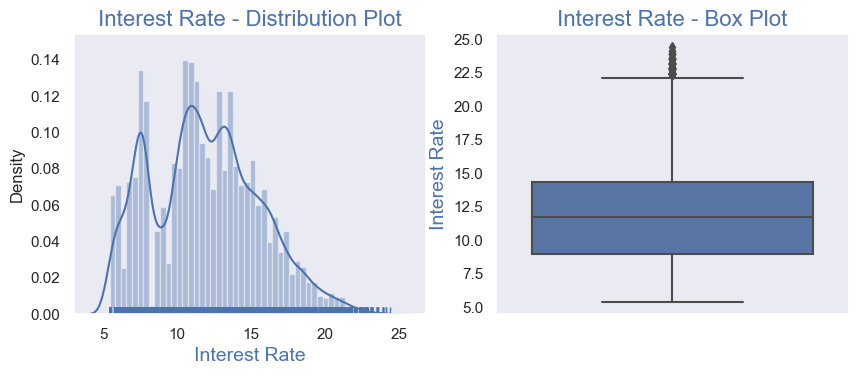

In [1433]:
# Univariate Analysis on Intrest Rate-Quantitative Variables
plt.figure(figsize=(10,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color='b')
plt.show()

#### Observations :
1. Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/2485513094.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['annual_inc'],rug = True)


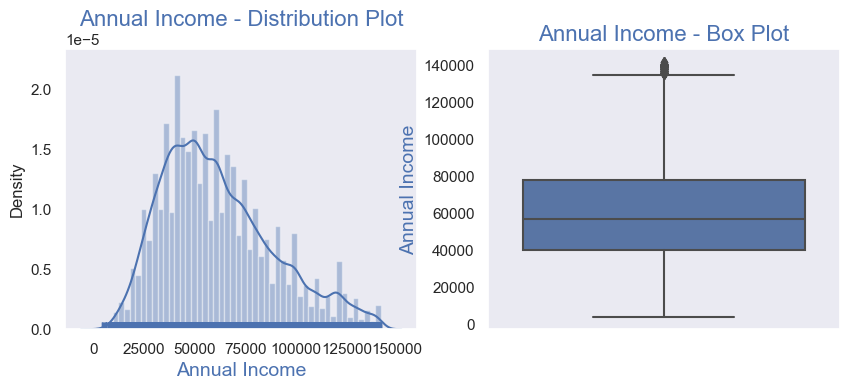

In [1434]:
# Univariate Analysis on Annual Income - Quantitative Variables
plt.figure(figsize=(10,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Annual Income',fontsize=14,color='b')
plt.show()

#### Observations :
1. Above plots show that most of the borrower's Annual incomes are in range of 40000- 80000

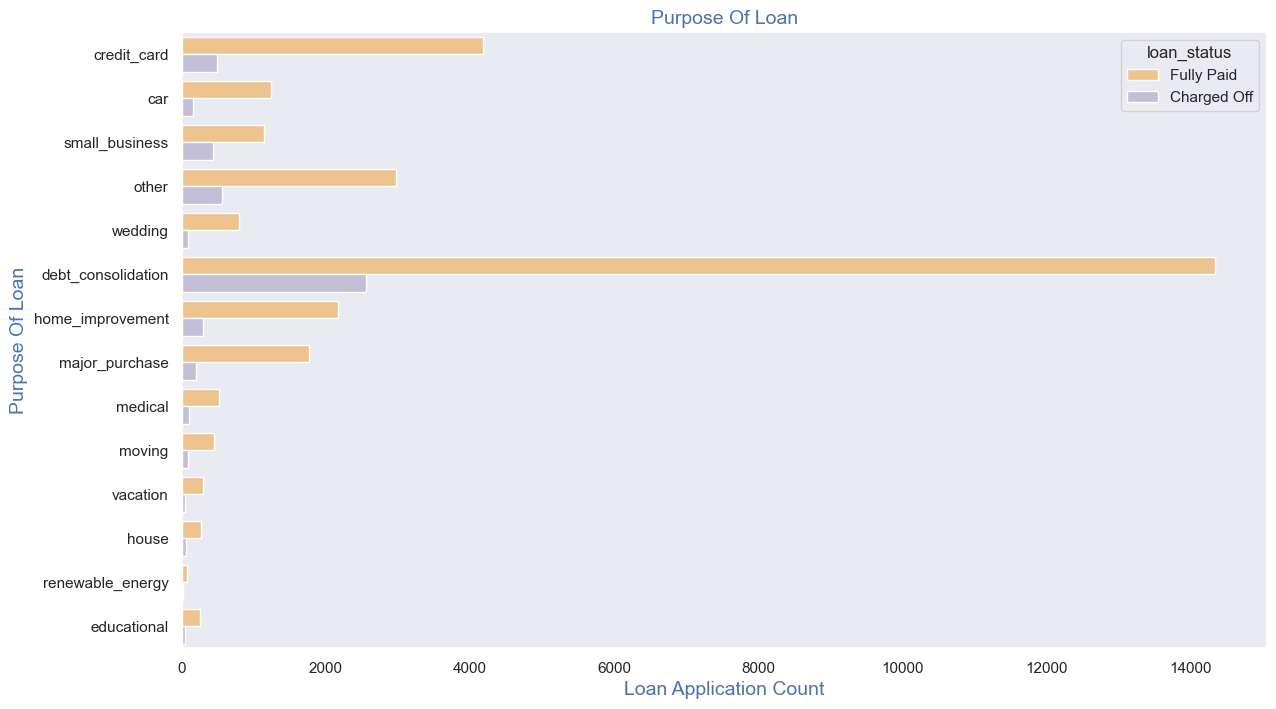

In [1435]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8))
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='PuOr')
ax.set_title('Purpose Of Loan',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

#### Observations :
1. Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
2. Number of chraged off count also high too for these loans.

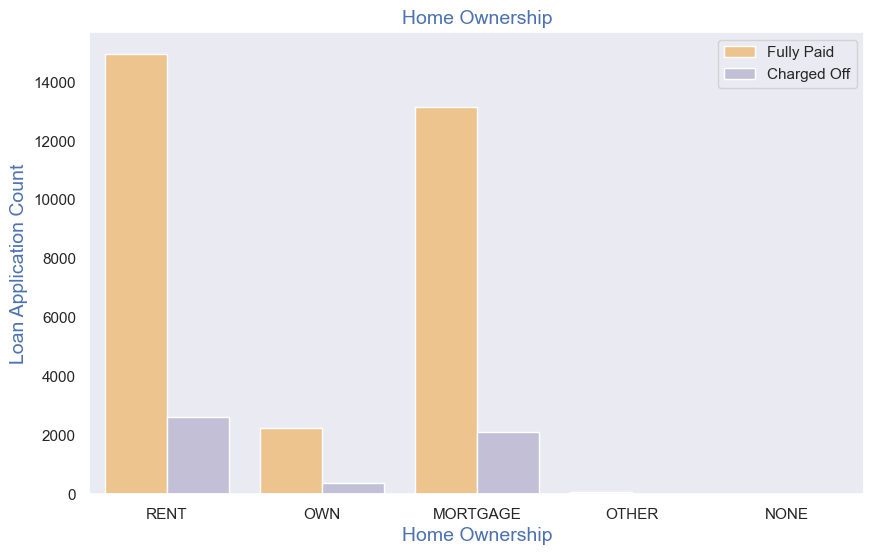

In [1436]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='PuOr')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

#### Observations :
1. Below plot shows that most of them living in rented home or mortgazed their home.
2. Applicant numbers are high from these categories so charged off is high too.

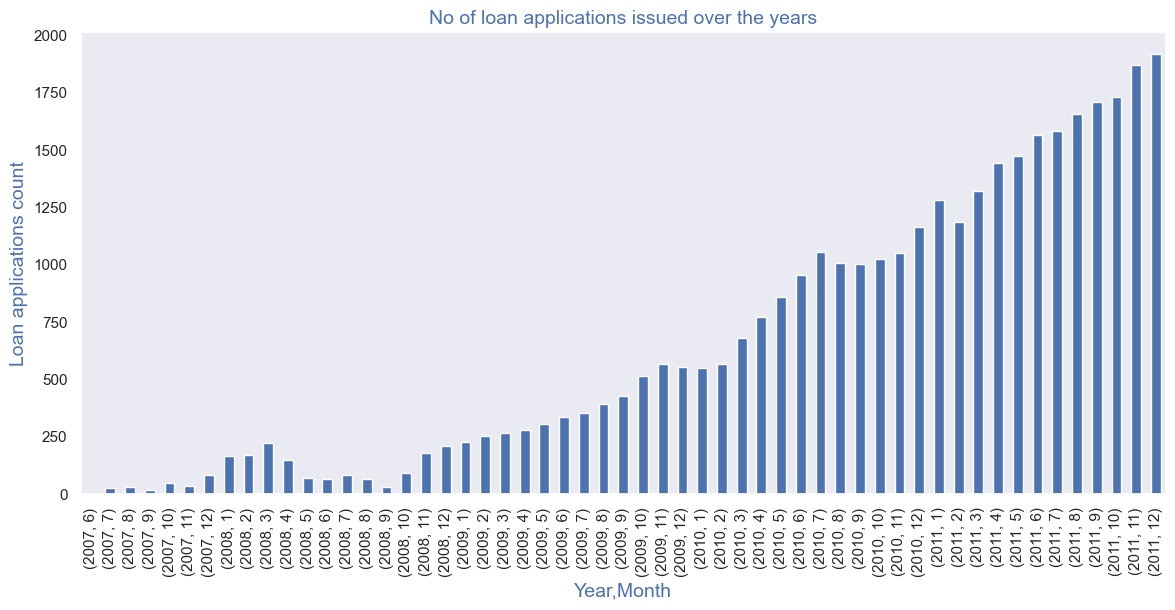

In [1437]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6))
loan.groupby([loan['issue_d'].dt.year,loan['issue_d'].dt.month]).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='b')
plt.xlabel('Year,Month',fontsize=14,color = 'b')      
plt.title("No of loan applications issued over the years",fontsize=14,color='b')
plt.show()

#### Observation is that count of loan application is increasing every passing year.
1. so increase in number of loan applications are adding more to number of charged off applications.
2. number of loans issued in 2008( May-October) got dipped, may be due to Recession.

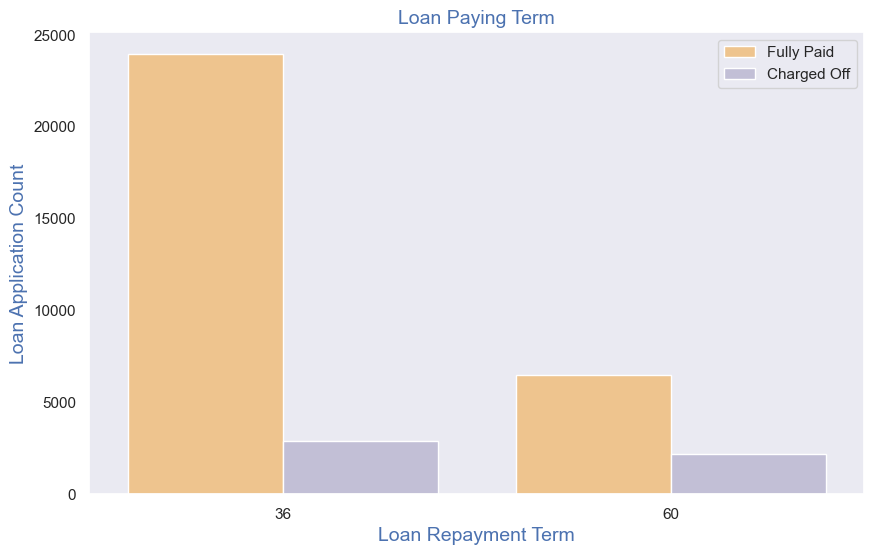

In [1438]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='PuOr')
ax.set_title('Loan Paying Term',fontsize=14,color='b')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations :
1. Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
2. charged off as compared to applicants who had taken loan for 36 months.

### Bivariate Analysis : 

 In this part of analysis, lets try to analyze the loan status against some important columns which might have played 
 important role in charged off of loans. Lets try to find proportion of charged offs in some categories.

 To calculate the proportion of charged off loans, will do these below steps:

 Group loans by different variables and loan status, get the count,use .unstack() to return a DataFrame.
 
 Since we’re going to use this for further analysis, it will be helpful to use .reset_index() to clean up the index. 
 
 Assign the new DataFrame to a variable.
 
 Create a simple derived column that sums charged off,current and fully paid loans for each category.
 
 Divide the number of charged off loans by the total number of loans to get the proportion of charged off loans. 
 
 Store this as another derived column. 
 
 Finally, output the whole table, sorted by proportion of charged off in each category issued loans.

In [1439]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status annual_inc_cats  Charged Off  Fully Paid  Total  \
0                   0-20000          178         809    987   
1               20000-40000         1400        6697   8097   
2               40000-60000         1654        9320  10974   
3               60000-80000          986        6502   7488   
4                   80000 +          899        7108   8007   

loan_status  Chargedoff_Proportion  
0                         0.180344  
1                         0.172904  
2                         0.150720  
3                         0.131677  
4                         0.112277

#### Observations:
1. Income range 80000+  has less chances of charged off.
2. Income range 0-20000 has high chances of charged off.
3. Notice that with increase in annual income charged off proportion got decreased. 

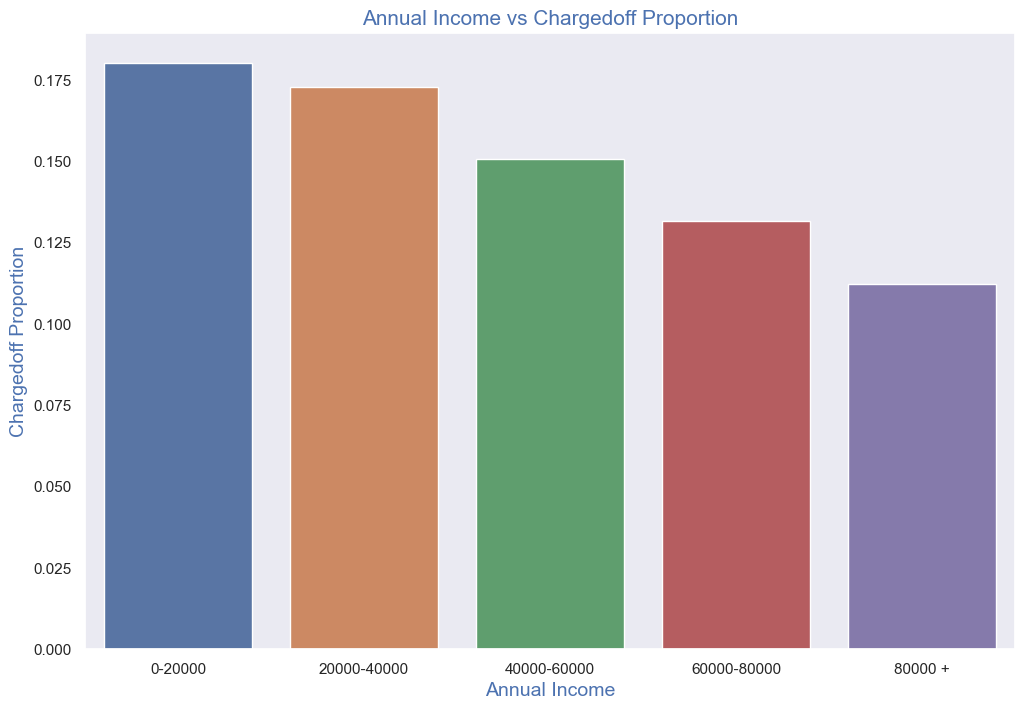

In [1440]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()

#### Observations:
1. Income range 80000+  has less chances of charged off.
2. Income range 0-20000 has high chances of charged off.
3. Notice that with increase in annual income charged off proportion got decreased. 

In [1441]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          433        1141   1574   
10             renewable_energy           16          70     86   
5                         house           53         270    323   
3                   educational           49         251    300   
7                       medical           98         517    615   
9                         other          557        2972   3529   
8                        moving           82         443    525   
2            debt_consolidation         2559       14339  16898   
12                     vacation           49         288    337   
4              home_improvement          300        2165   2465   
0                           car          153        1245   1398   
1                   credit_card          484        4174   4658   
6                major_purchase          200        1769   1969   
13                      wedding           84         792    876   

loan_status  Chargedoff_Proportion  
11                        0.275095  
10                        0.186047  
5                         0.164087  
3                         0.163333  
7                         0.159350  
9                         0.157835  
8                         0.156190  
2                         0.151438  
12                        0.145401  
4                         0.121704  
0                         0.109442  
1                         0.103907  
6                         0.101574  
13                        0.095890

#### Observations:
1. small Business applicants have high chnaces of getting charged off.
2. renewable_energy where chanrged off proportion is better as compare to other categories.

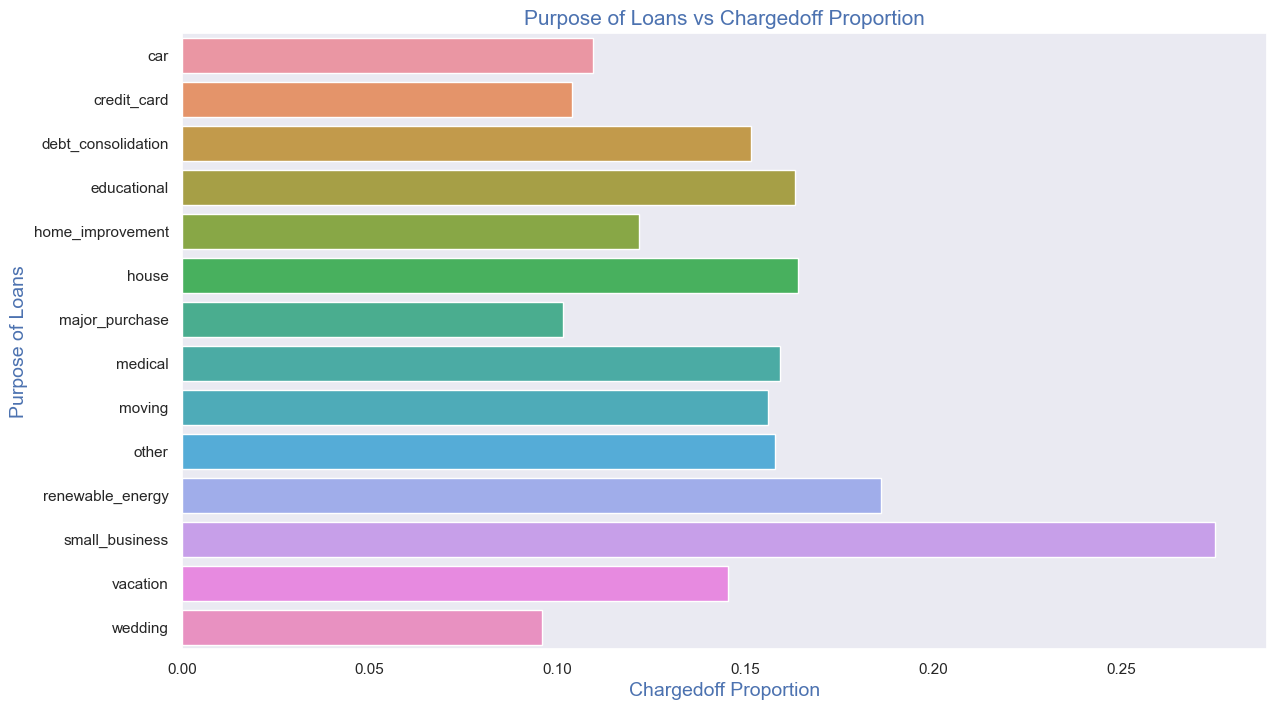

In [1442]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='b')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. small Business applicants have high chances of getting charged off.
2. renewable_energy where chanrged off proportion is better as compare to other categories.

In [1443]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
6               G           90         167    257               0.350195
5               F          280         585    865               0.323699
4               E          634        1755   2389               0.265383
3               D         1033        3672   4705               0.219554
2               C         1241        6047   7288               0.170280
1               B         1295        9487  10782               0.120108
0               A          544        8723   9267               0.058703

#### Observations:
1. Grade "A" has very less chances of charged off.
2. Grade "F" and "G" have very high chances of charged off.
3. Chances of charged off is increasing with grade moving from "A" towards "G"

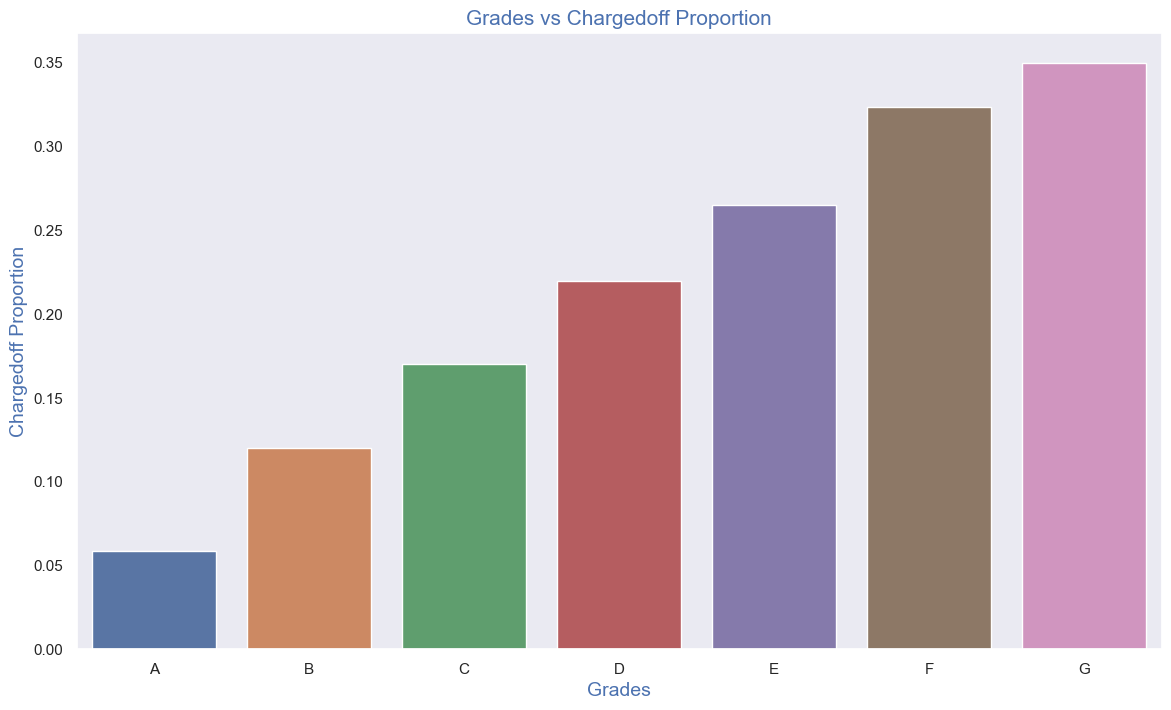

In [1444]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='b')
plt.show()

#### Observations:
1. Grade "A" has very less chances of charged off.
2. Grade "F" and "G" have very high chances of charged off.
3. Chances of charged of is increasing with grade moving from "A" towards "G"

In [1445]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status sub_grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
29                 F5           49          46     95               0.515789
32                 G3           19          22     41               0.463415
34                 G5            9          13     22               0.409091
31                 G2           25          40     65               0.384615
28                 F4           45          90    135               0.333333
30                 G1           26          58     84               0.309524
26                 F2           63         147    210               0.300000
23                 E4          114         272    386               0.295337
27                 F3           45         109    154               0.292208
25                 F1           78         193    271               0.287823
24                 E5           95         239    334               0.284431
20                 E1          180         484    664               0.271084
21                 E2          142         409    551               0.257713
19                 D5          194         571    765               0.253595
33                 G4           11          34     45               0.244444
18                 D4          199         654    853               0.233294
17                 D3          236         798   1034               0.228240
22                 E3          103         351    454               0.226872
16                 D2          250         936   1186               0.210793
14                 C5          192         868   1060               0.181132
12                 C3          250        1131   1381               0.181028
15                 D1          154         713    867               0.177624
13                 C4          196         925   1121               0.174844
11                 C2          294        1512   1806               0.162791
10                 C1          309        1611   1920               0.160938
9                  B5          336        2099   2435               0.137988
8                  B4          303        1979   2282               0.132778
7                  B3          310        2268   2578               0.120248
6                  B2          199        1645   1844               0.107918
5                  B1          147        1496   1643               0.089470
4                  A5          201        2315   2516               0.079889
3                  A4          163        2510   2673               0.060980
2                  A3           89        1593   1682               0.052913
1                  A2           67        1319   1386               0.048341
0                  A1           24         986   1010               0.023762

#### Observations:
1. sub Grades of "A" has very less chances of charged off.
2. sub Grades of "F" and "G" have very high chances of charged off.
3. proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

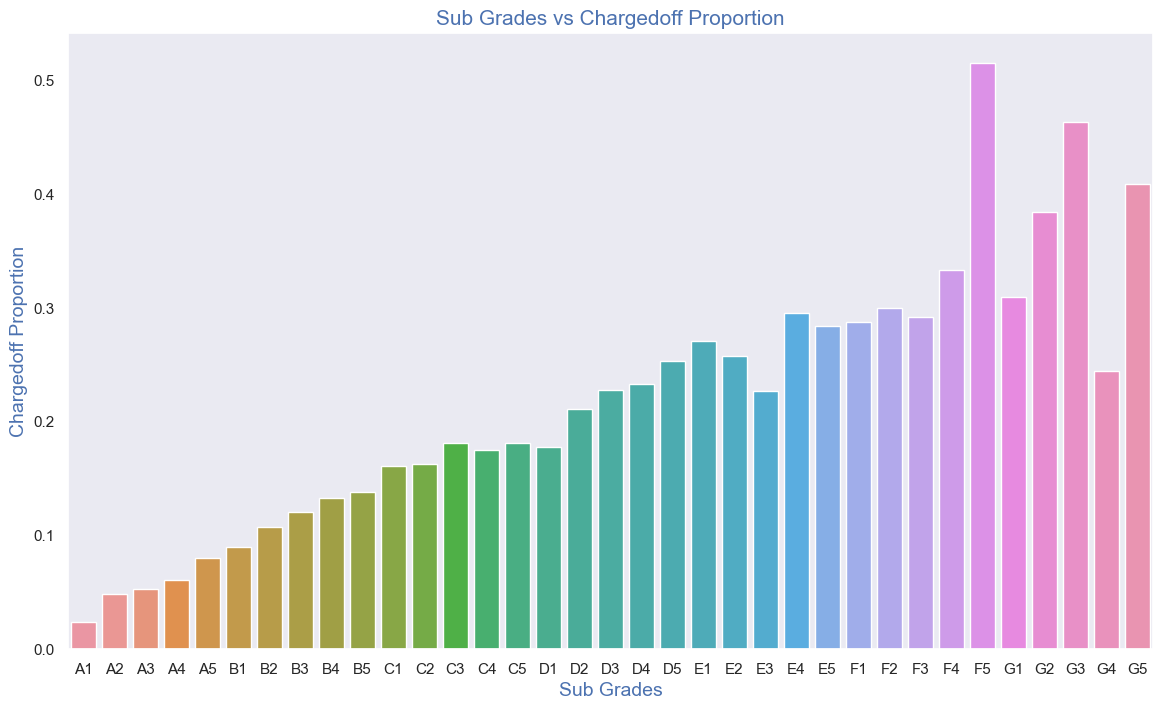

In [1446]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. sub Grades of "A" has very less chances of charged off.
2. sub Grades of "F" and "G" have very high chances of charged off.
3. proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [1447]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status int_rate_cats  Charged Off  Fully Paid  Total  \
3                    16 +         1139        3059   4198   
2                 12.5-16         1845        8815  10660   
1                   10-13         1135        7553   8688   
0                    0-10          739       10608  11347   

loan_status  Chargedoff_Proportion  
3                         0.271320  
2                         0.173077  
1                         0.130640  
0                         0.065127

#### Observations:
1. interest rate less than 10% has very less chances of charged off. Interest rates are starting from minimum 5 %.
2. interest rate more than 16% has good chances of charged off as compared to other category interest rates.
3. Charged off proportion is increasing with higher interest rates.

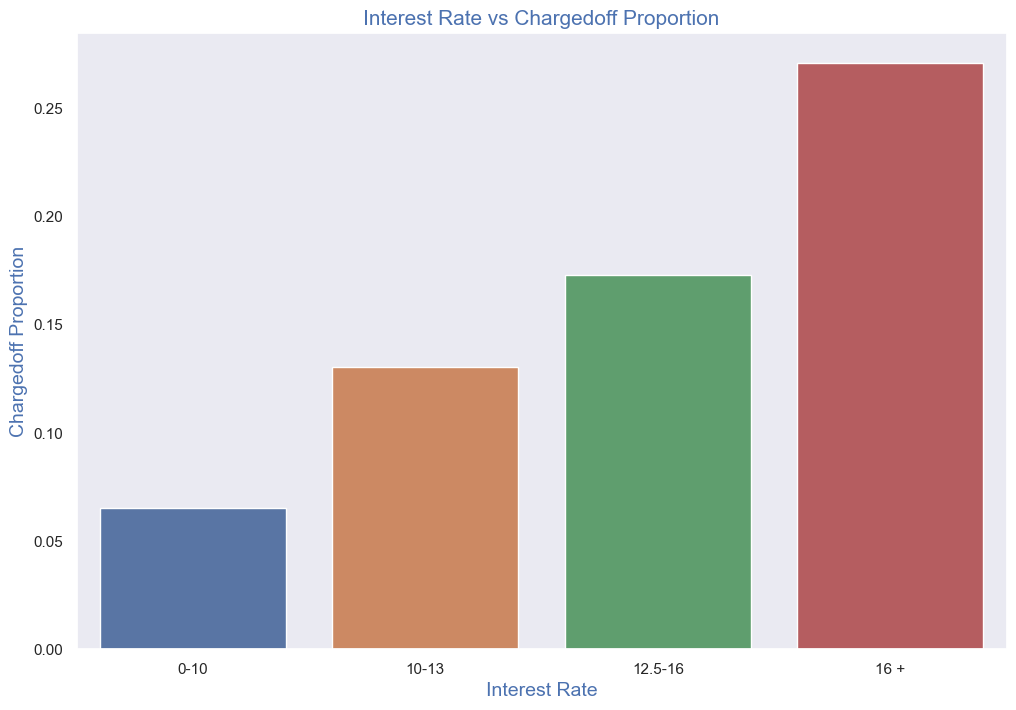

In [1448]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. interest rate less than 10% has very less chances of charged off. Interest rates are starting from minimum 5 %.
2. interest rate more than 16% has good chances of charged off as compared to other category interest rates.
3. Charged off proportion is increasing with higher interest rates.

In [1449]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off']  + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status emp_length  Charged Off  Fully Paid  Total  Chargedoff_Proportion
1                   10         1260        6621   7881               0.159878
7                    7          251        1389   1640               0.153049
0                    1         1043        6299   7342               0.142059
5                    5          430        2602   3032               0.141821
8                    8          190        1150   1340               0.141791
6                    6          292        1780   2072               0.140927
3                    3          529        3285   3814               0.138700
4                    4          434        2755   3189               0.136093
2                    2          541        3551   4092               0.132209
9                    9          147        1004   1151               0.127715

#### Observations:
1. Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. It makes sense as with less or no experience they don't have source of income to repay loan.
3. Rest of the applicants have more or less same chnaces of getting charged off.

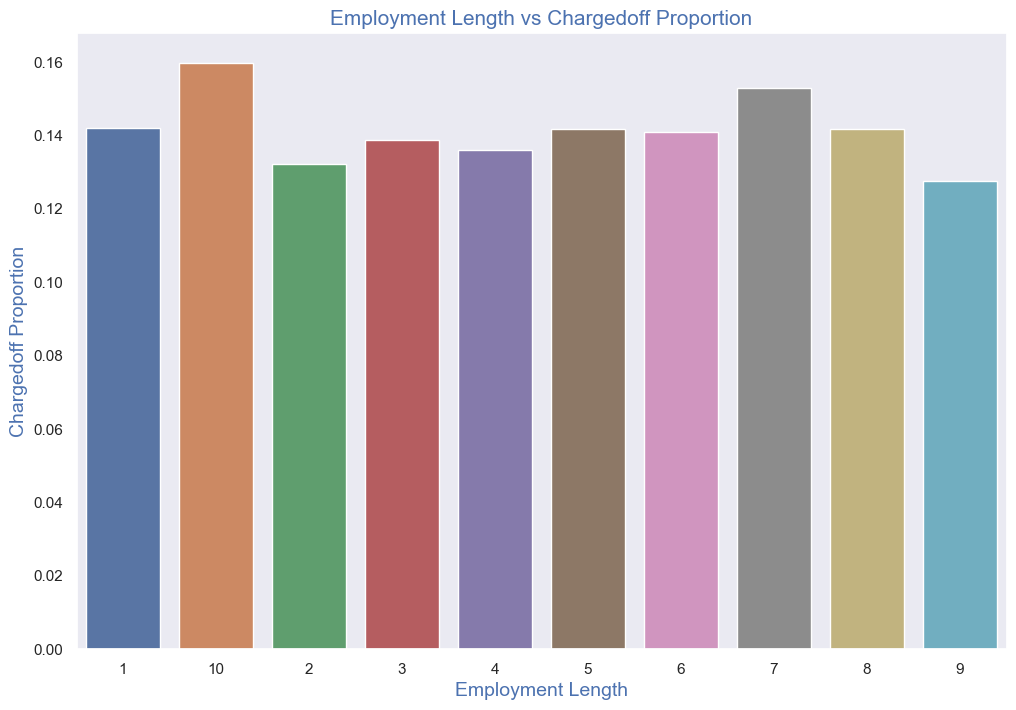

In [1450]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. It makes sense as with less or no experience they don't have source of income to repay loan.
3. Rest of the applicants have more or less same chances of getting charged off.

In [1451]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status addr_state  Charged Off  Fully Paid   Total  Chargedoff_Proportion
28                  NE          3.0         2.0     5.0               0.600000
32                  NV         96.0       346.0   442.0               0.217195
13                  ID          1.0         4.0     5.0               0.200000
0                   AK         13.0        56.0    69.0               0.188406
40                  SD         11.0        49.0    60.0               0.183333
11                  HI         28.0       128.0   156.0               0.179487
9                   FL        459.0      2104.0  2563.0               0.179087
31                  NM         29.0       144.0   173.0               0.167630
36                  OR         67.0       346.0   413.0               0.162228
24                  MO        101.0       523.0   624.0               0.161859
30                  NJ        265.0      1380.0  1645.0               0.161094
10                  GA        201.0      1047.0  1248.0               0.161058
4                   CA       1004.0      5355.0  6359.0               0.157886
20                  MD        148.0       797.0   945.0               0.156614
43                  UT         37.0       200.0   237.0               0.156118
29                  NH         23.0       125.0   148.0               0.155405
27                  NC        107.0       585.0   692.0               0.154624
46                  WA        115.0       635.0   750.0               0.153333
17                  KY         44.0       255.0   299.0               0.147157
35                  OK         40.0       236.0   276.0               0.144928
22                  MI         93.0       555.0   648.0               0.143519
39                  SC         62.0       371.0   433.0               0.143187
3                   AZ        107.0       660.0   767.0               0.139505
47                  WI         57.0       353.0   410.0               0.139024
23                  MN         77.0       486.0   563.0               0.136767
14                  IL        187.0      1182.0  1369.0               0.136596
33                  NY        442.0      2920.0  3362.0               0.131469
38                  RI         24.0       160.0   184.0               0.130435
6                   CT         85.0       568.0   653.0               0.130168
44                  VA        166.0      1111.0  1277.0               0.129992
26                  MT         10.0        67.0    77.0               0.129870
18                  LA         50.0       341.0   391.0               0.127877
48                  WV         20.0       140.0   160.0               0.125000
34                  OH        138.0       973.0  1111.0               0.124212
5                   CO         89.0       631.0   720.0               0.123611
19                  MA        141.0      1041.0  1182.0               0.119289
37                  PA        165.0      1221.0  1386.0               0.119048
41                  TN          2.0        15.0    17.0               0.117647
1                   AL         47.0       357.0   404.0               0.116337
42                  TX        278.0      2135.0  2413.0               0.115209
2                   AR         25.0       195.0   220.0               0.113636
45                  VT          6.0        47.0    53.0               0.113208
16                  KS         25.0       208.0   233.0               0.107296
25                  MS          2.0        17.0    19.0               0.105263
8                   DE         11.0        94.0   105.0               0.104762
7                   DC         13.0       181.0   194.0               0.067010
49                  WY          3.0        73.0    76.0               0.039474
21                  ME          0.0         3.0     3.0               0.000000
15                  IN          0.0         9.0     9.0               0.000000
12                  IA          0.0         5.0   

#### Observations:
1. states NE has very high chances of charged off but number of applications are too low to make any decisions.
2. NV,CA and FL states shows good number of charged offs in good number of applications.

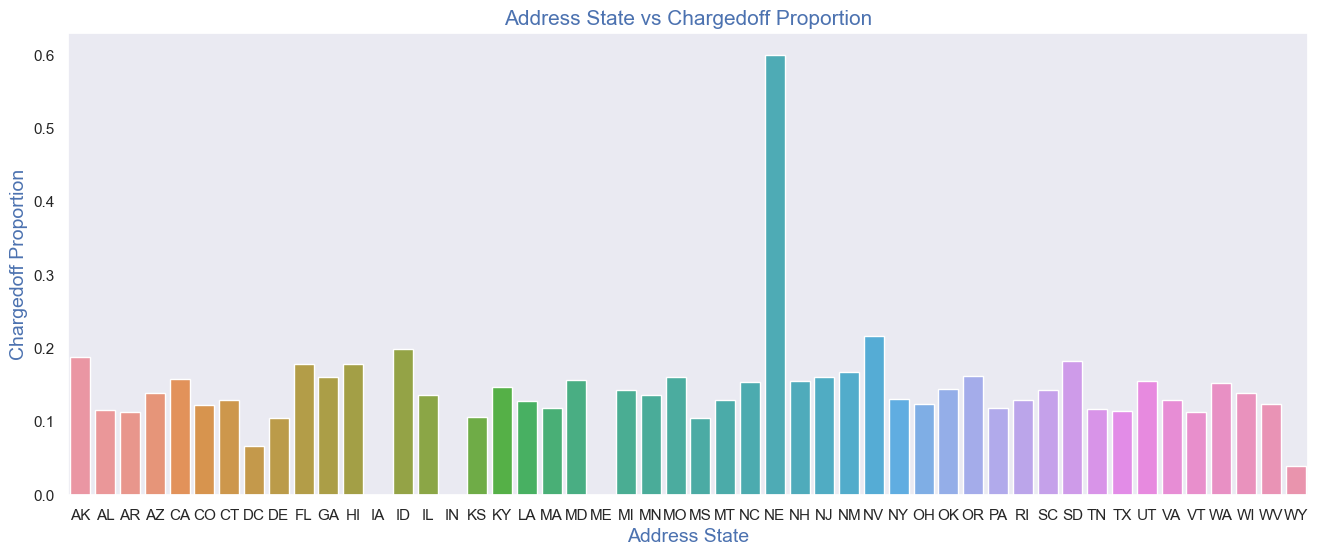

In [1452]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. states NE has very high chances of charged off but number of applications are too low to make any decisions.
2. NV,CA and FL states shows good number of charged offs in good number of applications.

In [1453]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         1832        8947  10779   
1               Source Verified         1320        7641   8961   
0                  Not Verified         1965       13848  15813   

loan_status  Chargedoff_Proportion  
2                         0.169960  
1                         0.147305  
0                         0.124265

#### Observations:
1. There is not much difference in charged off proportion.
2. This variable doesn't provide any insights for charged off.

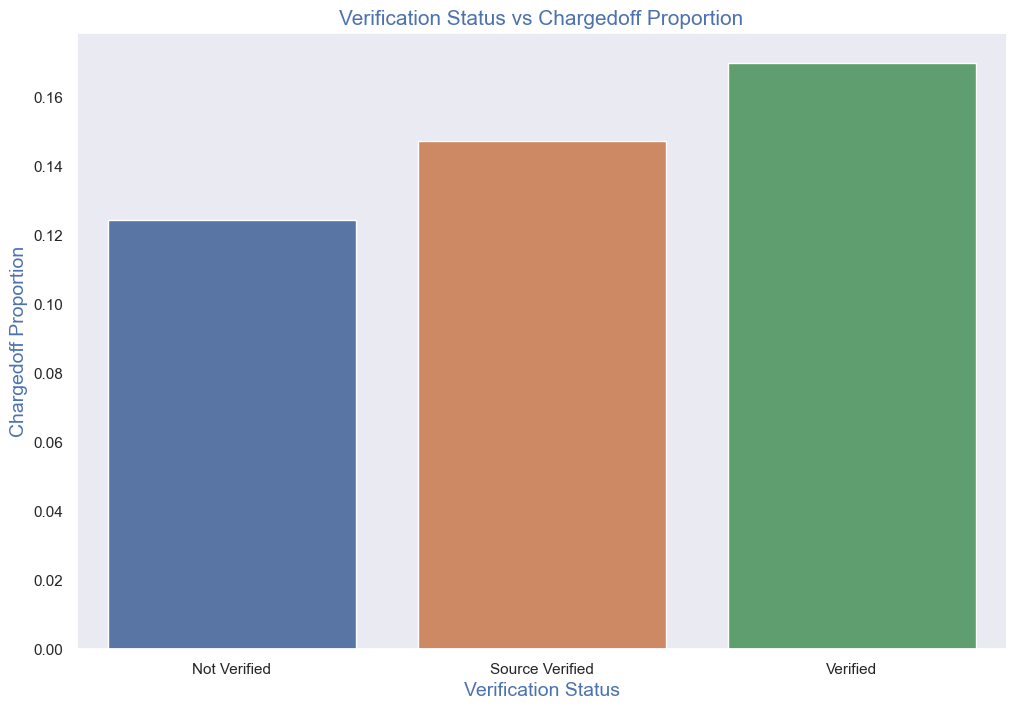

In [1454]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. There is not much difference in charged off proportion.
2. This variable doesn't provide any insights for charged off.

In [1455]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
2                            2.0            2           3      5   
1                            1.0          324        1163   1487   
3                      Not Known          112         545    657   
0                            0.0         4679       28725  33404   

loan_status  Chargedoff_Proportion  
2                         0.400000  
1                         0.217888  
3                         0.170472  
0                         0.140073

#### Observations:
1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
3. Not known is the column for which we don't have any information abount borrower.
4. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

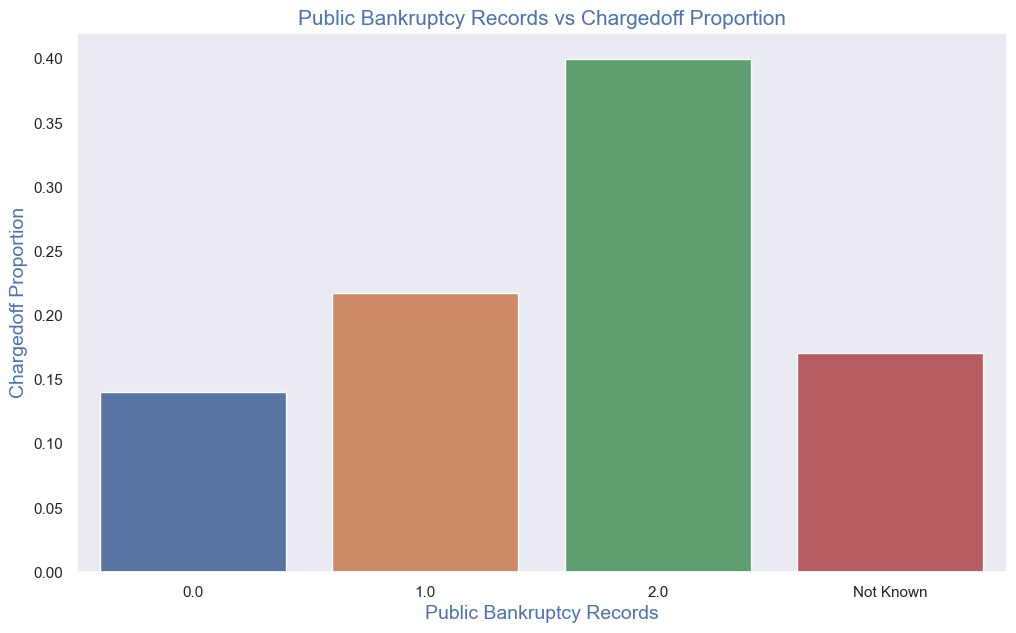

In [1456]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
3. Not known is the column for which we don't have any information abount borrower.
4. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [1457]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  pub_rec  Charged Off  Fully Paid    Total  Chargedoff_Proportion
2                  2         10.0        34.0     44.0               0.227273
1                  1        409.0      1432.0   1841.0               0.222162
0                  0       4698.0     28962.0  33660.0               0.139572
3                  3          0.0         6.0      6.0               0.000000
4                  4          0.0         2.0      2.0               0.000000

###### Observations:
1. A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
2. your ability to qualify for credit or other services. Public records and collections are derogatory items
3. because they reflect financial obligations that were not paid as agreed.
4. Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
5. pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

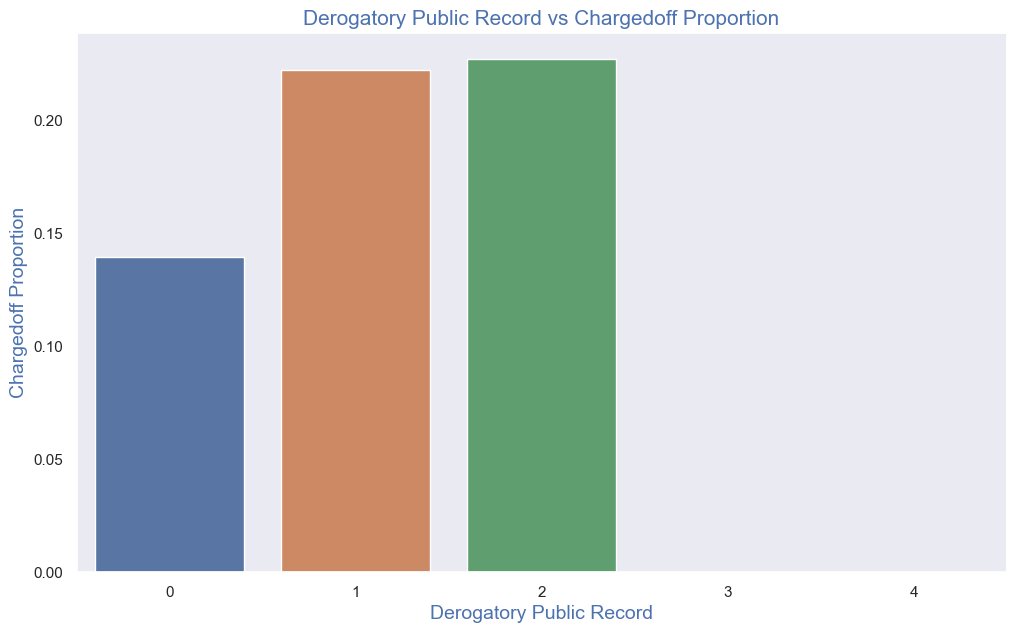

In [1458]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
2. your ability to qualify for credit or other services. Public records and collections are derogatory items
3. because they reflect financial obligations that were not paid as agreed.
4. Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
5. pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

### Bivariate Analysis Advance

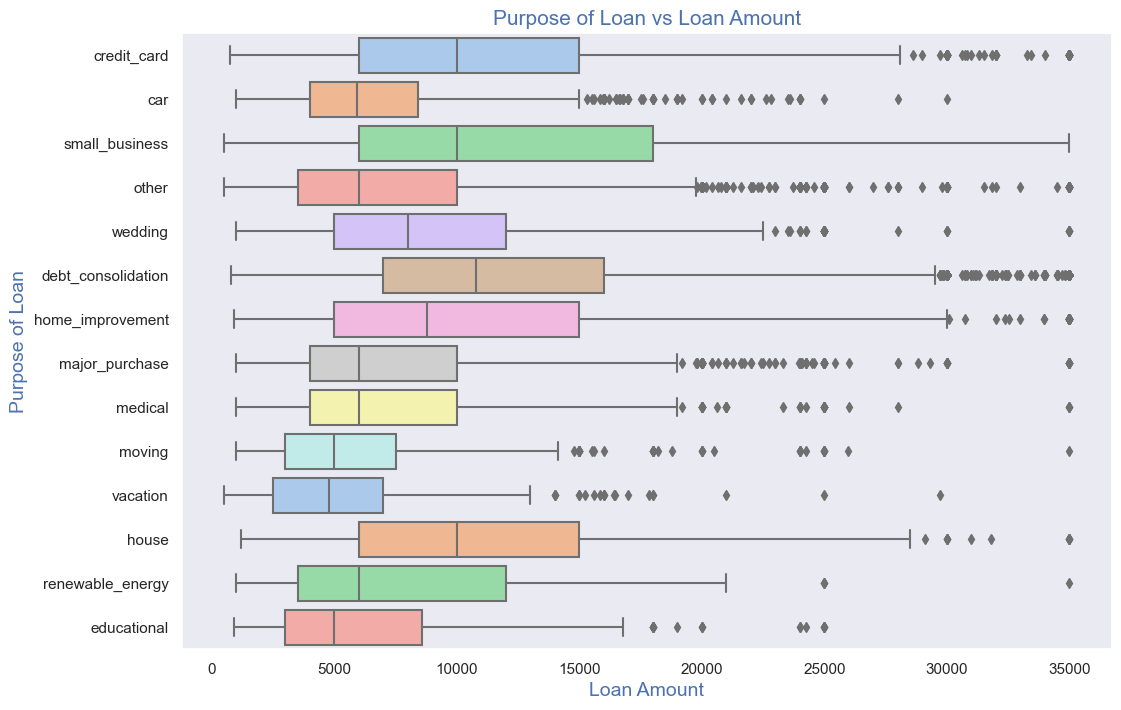

In [1459]:
# Bivariate Analysis - Purpose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='pastel')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
2. Debt consolidation is second and Credit card comes 3rd.

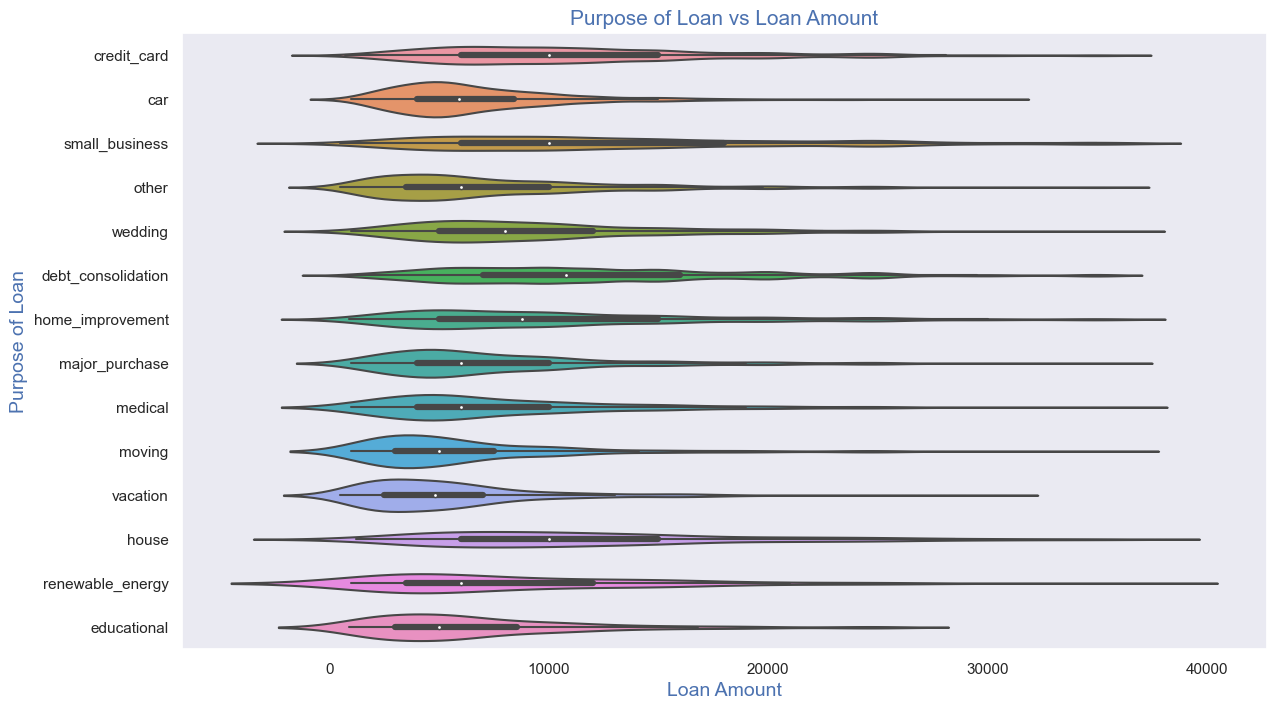

In [1460]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8))
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
2. as compare to loan taken for other purposes.

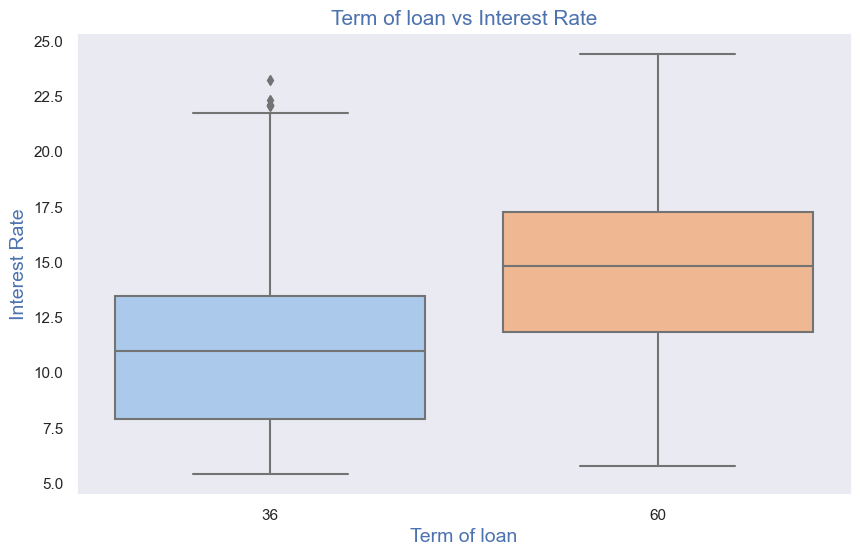

In [1461]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6))
ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='pastel')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Term of loan',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. Average interest rate is higher for 60 months loan term.
2. Most of the loans issued for longer term had higher interest rates for repayment.

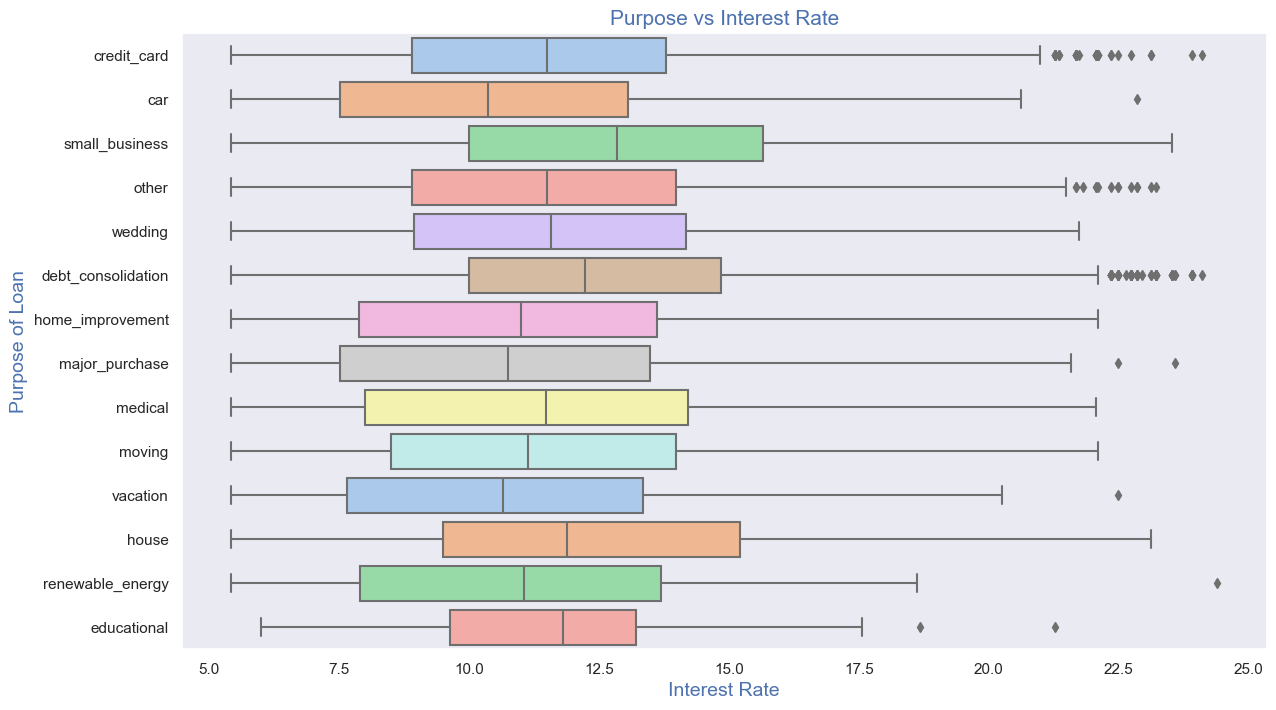

In [1462]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='pastel')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. It is clear that avearge interest rate is highest for small business purpose.
2. Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
3. Debt consolidation is 2nd where borrowers had to pay more interest rate.

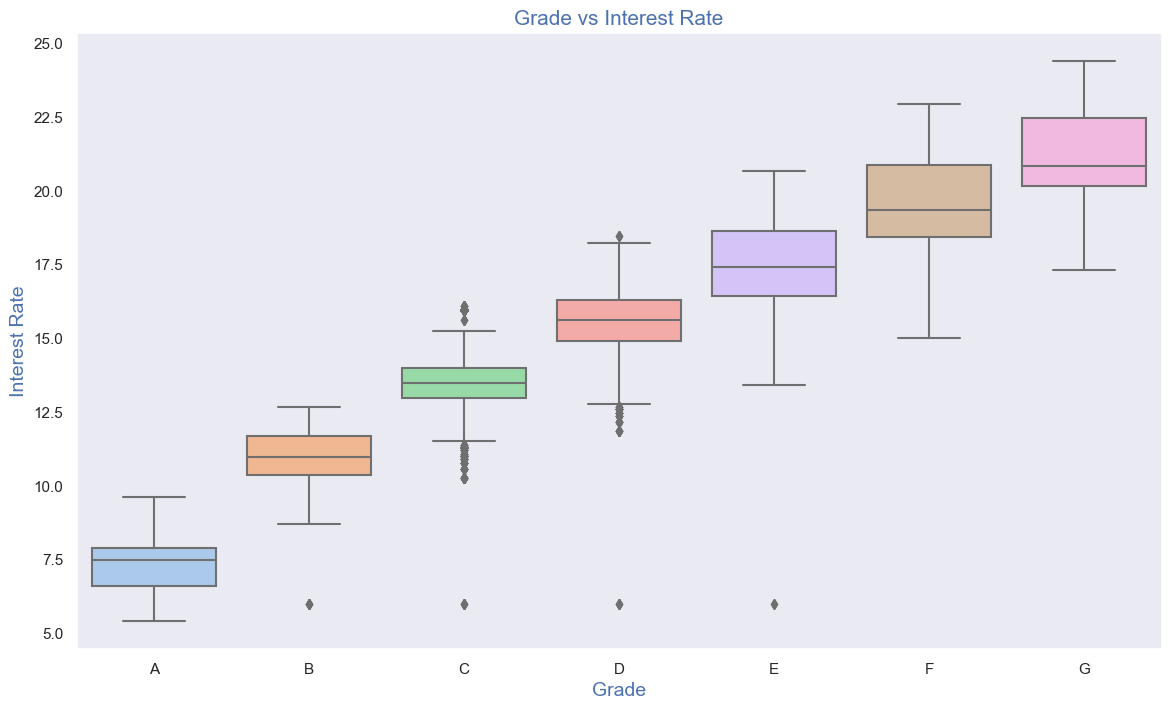

In [1463]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='pastel',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. A-grade is a top letter grade for a lender to assign to a borrower.
2. The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
3. It is clear that intrest rate is increasing with grades moving from A to F.

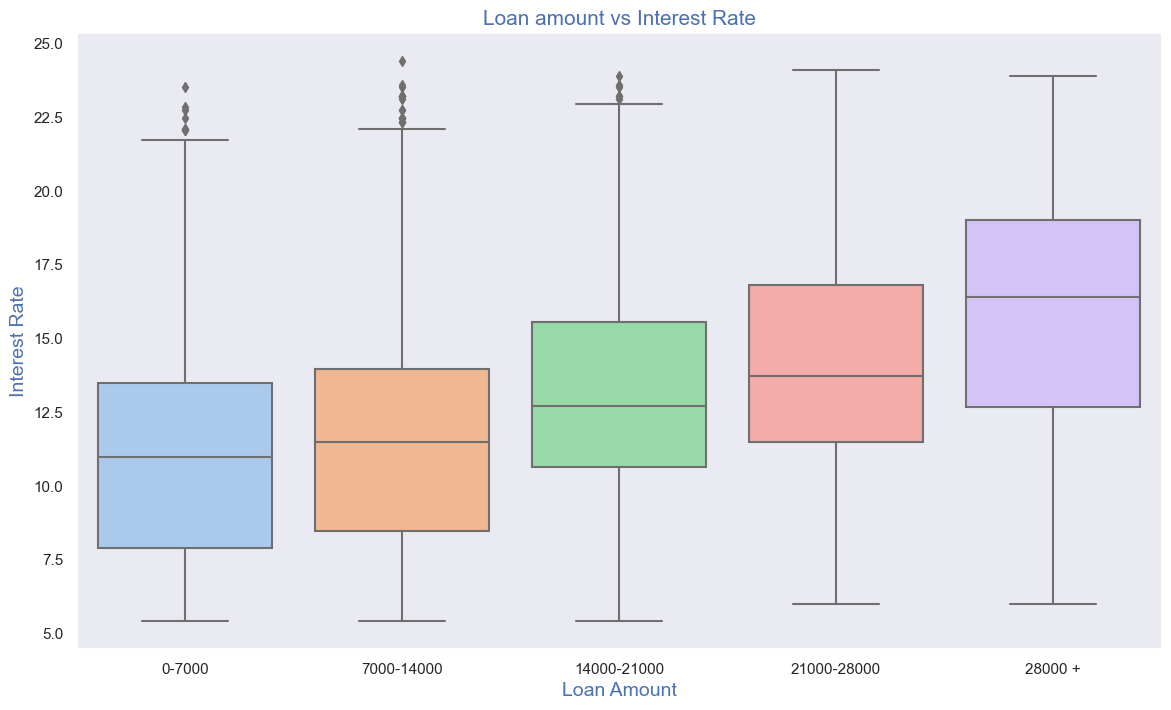

In [1464]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan,palette='pastel')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. It is clear that intrest rate is increasing with loan amount increase.
2. probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.

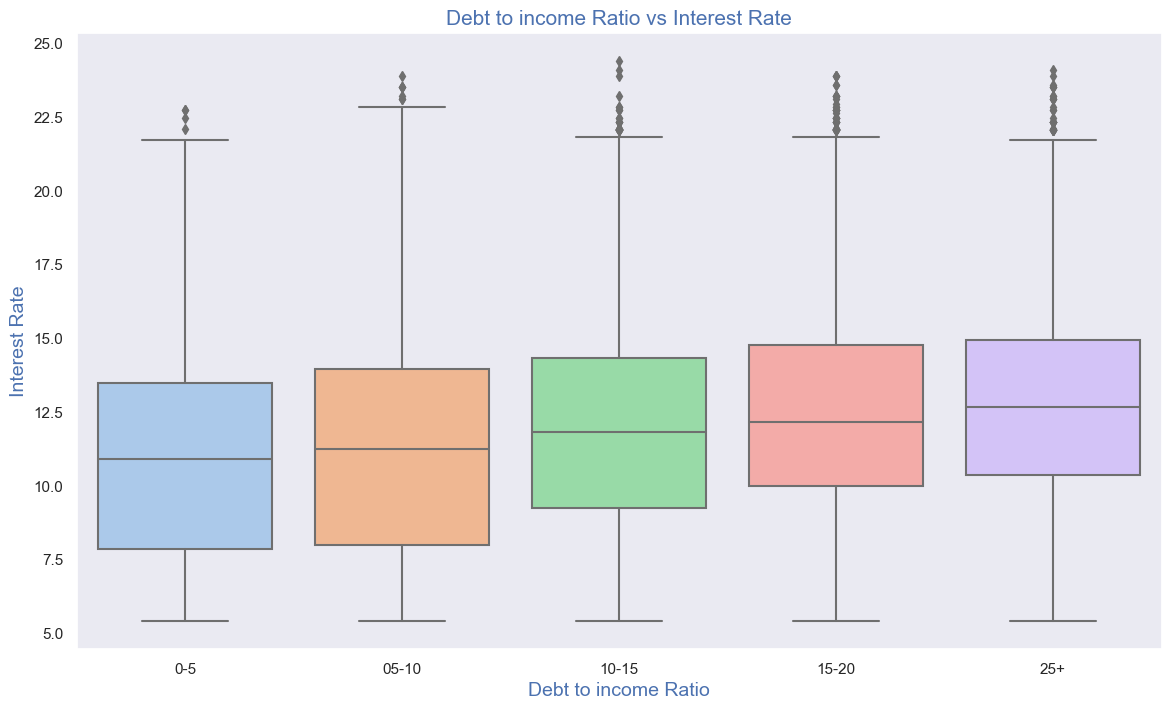

In [1465]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan,palette='pastel')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. If your DTI is low enough you may get a lower interest rate.
2. Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

/var/folders/g5/5rsl12417f1_3r2ky3dwg45r0000gp/T/ipykernel_73084/1491259282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100)


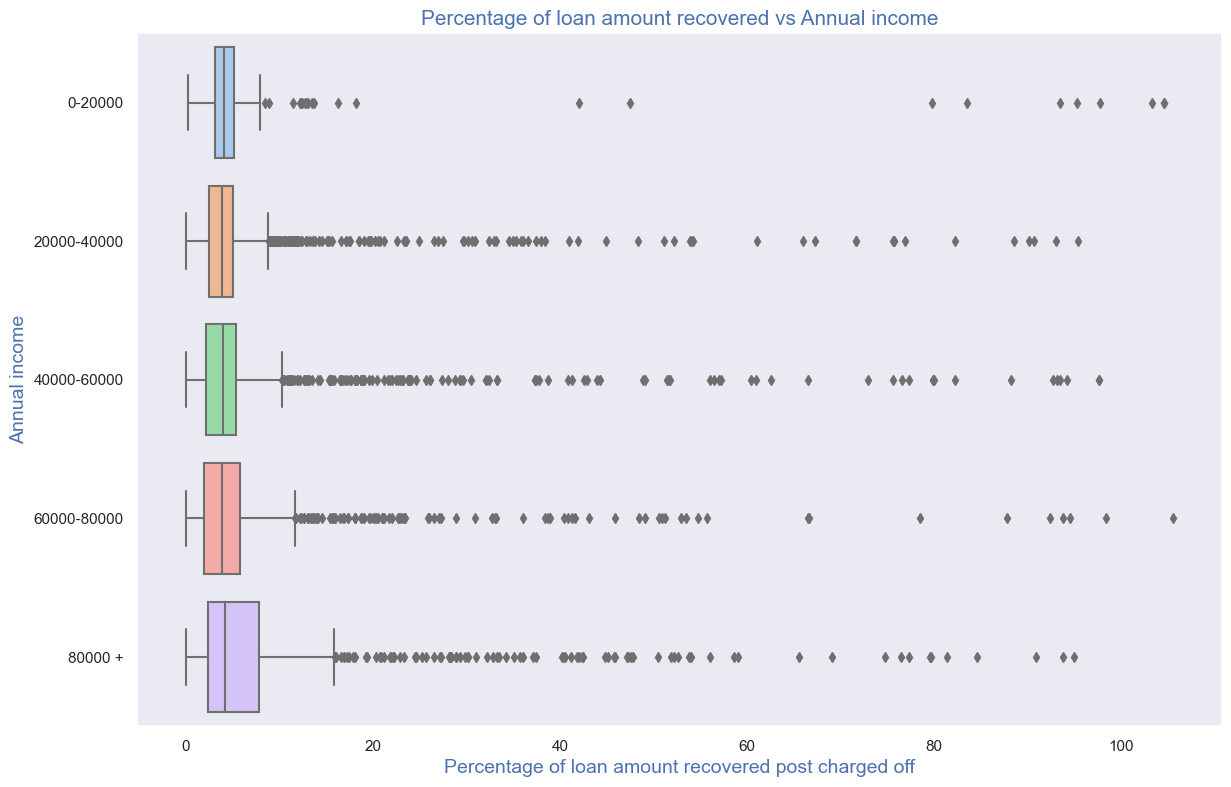

In [1466]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9))
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='pastel')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'b')
ax.set_ylabel('Annual income',fontsize=14,color = 'b')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. Higher percentage of loan amount is recovered when annual income is high.
2. Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

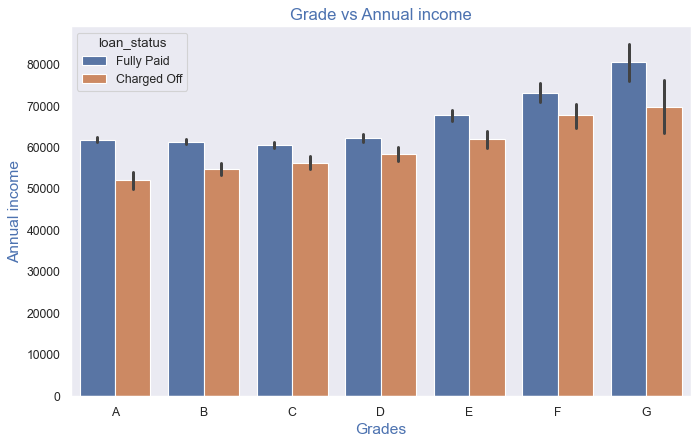

In [1467]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80)
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='b')
ax.set_ylabel('Annual income',fontsize=14,color = 'b')
ax.set_xlabel('Grades',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
2. who 'paid fully' for each grade (i.e., at same interest range)

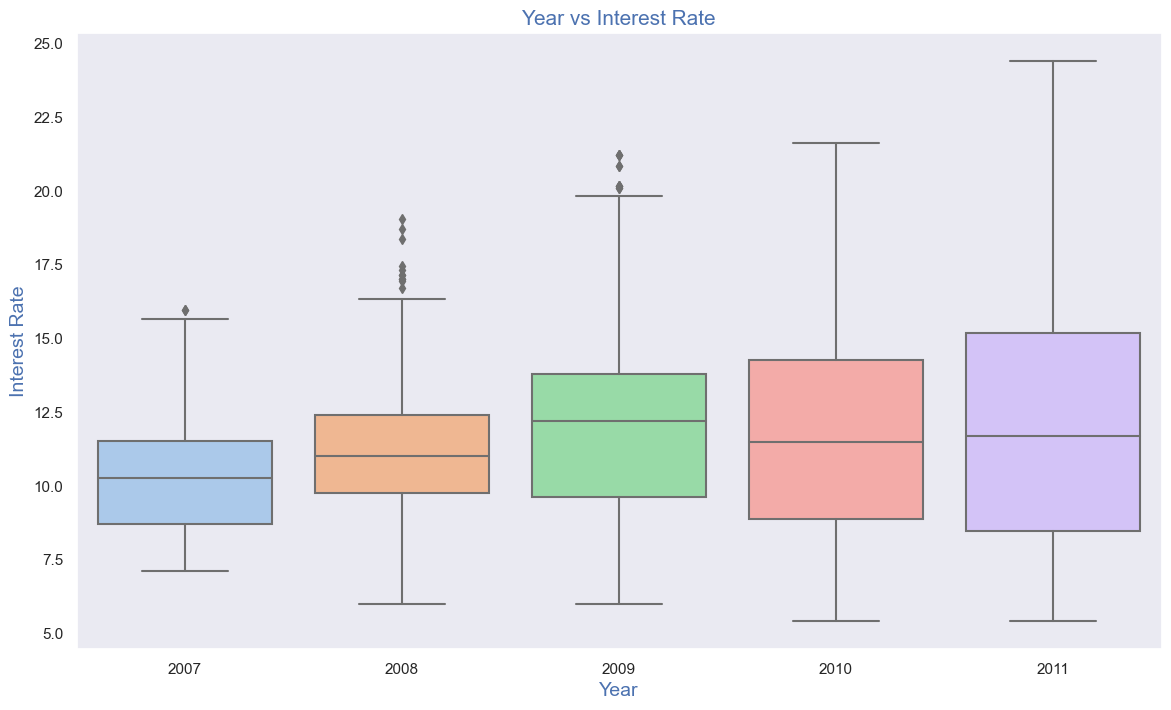

In [1468]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x=loan['issue_d'].dt.year, data =loan,palette='pastel')
ax.set_title('Year vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Year',fontsize=14,color = 'b')
plt.show()

#### Observations:
1. Plot shows interest rate is increasing slowly with increase in year.

### Multivariate Analysis - Pair Plots

/Users/Tanushree.Dharpure/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


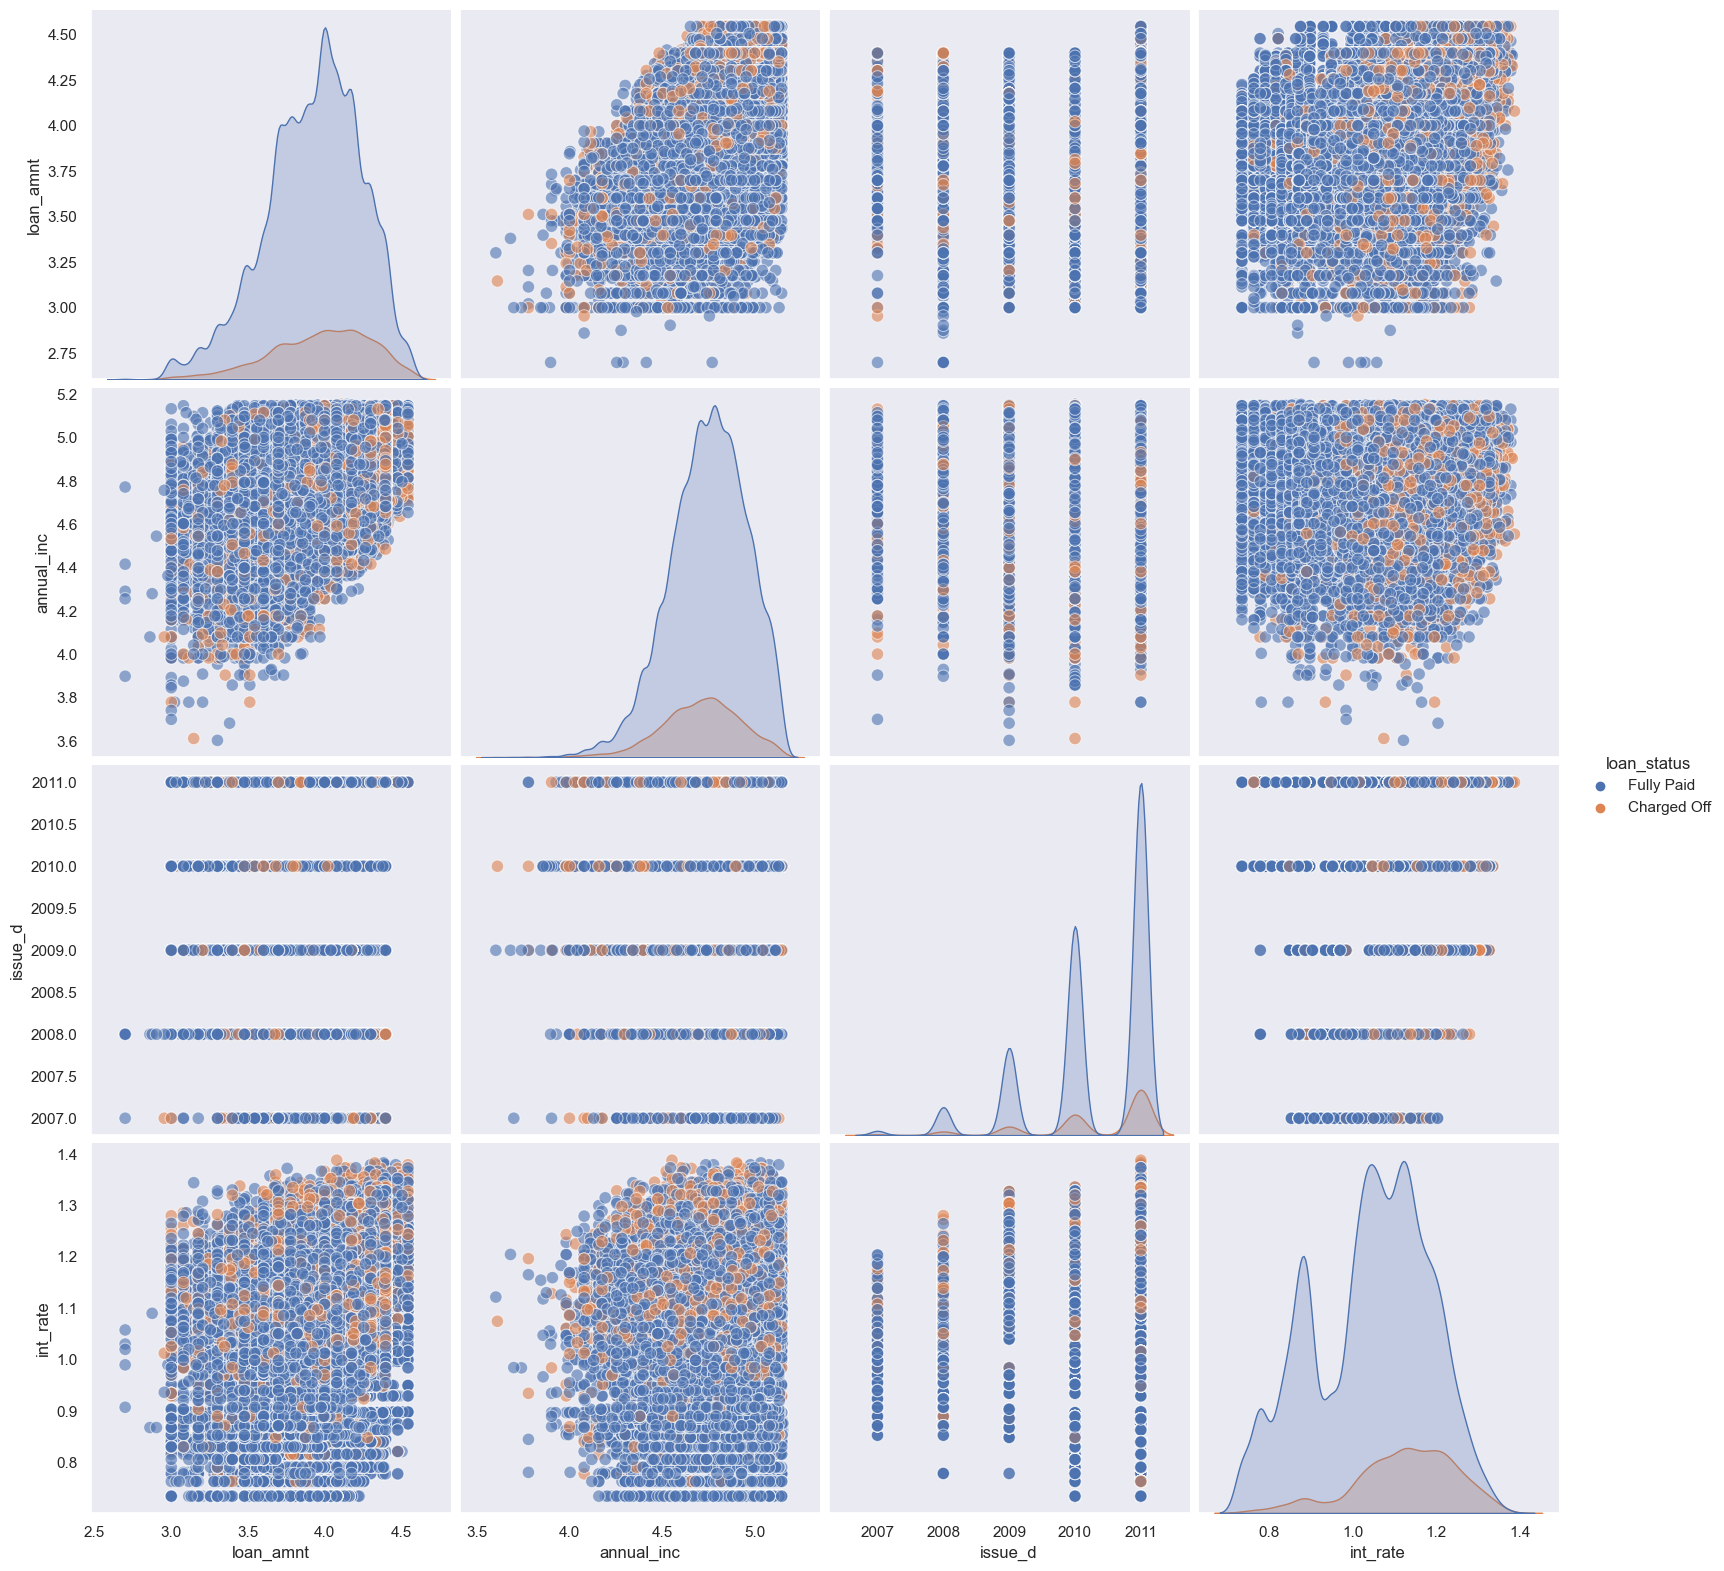

In [1469]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = loan[['loan_amnt', 'annual_inc', 'issue_d','int_rate','loan_status']].copy()
loan_pair['issue_d']=loan_pair['issue_d'].dt.year
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80},
             size = 4)
plt.show()

#### Observation:
1. Higher the inetrest rate higher charged off ratio
2. Higher the annual income higher the loan amount slightly.
3. increase in number of charged off with increase in year.
4. intrest rate is increasing with loan amount increase

/Users/Tanushree.Dharpure/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


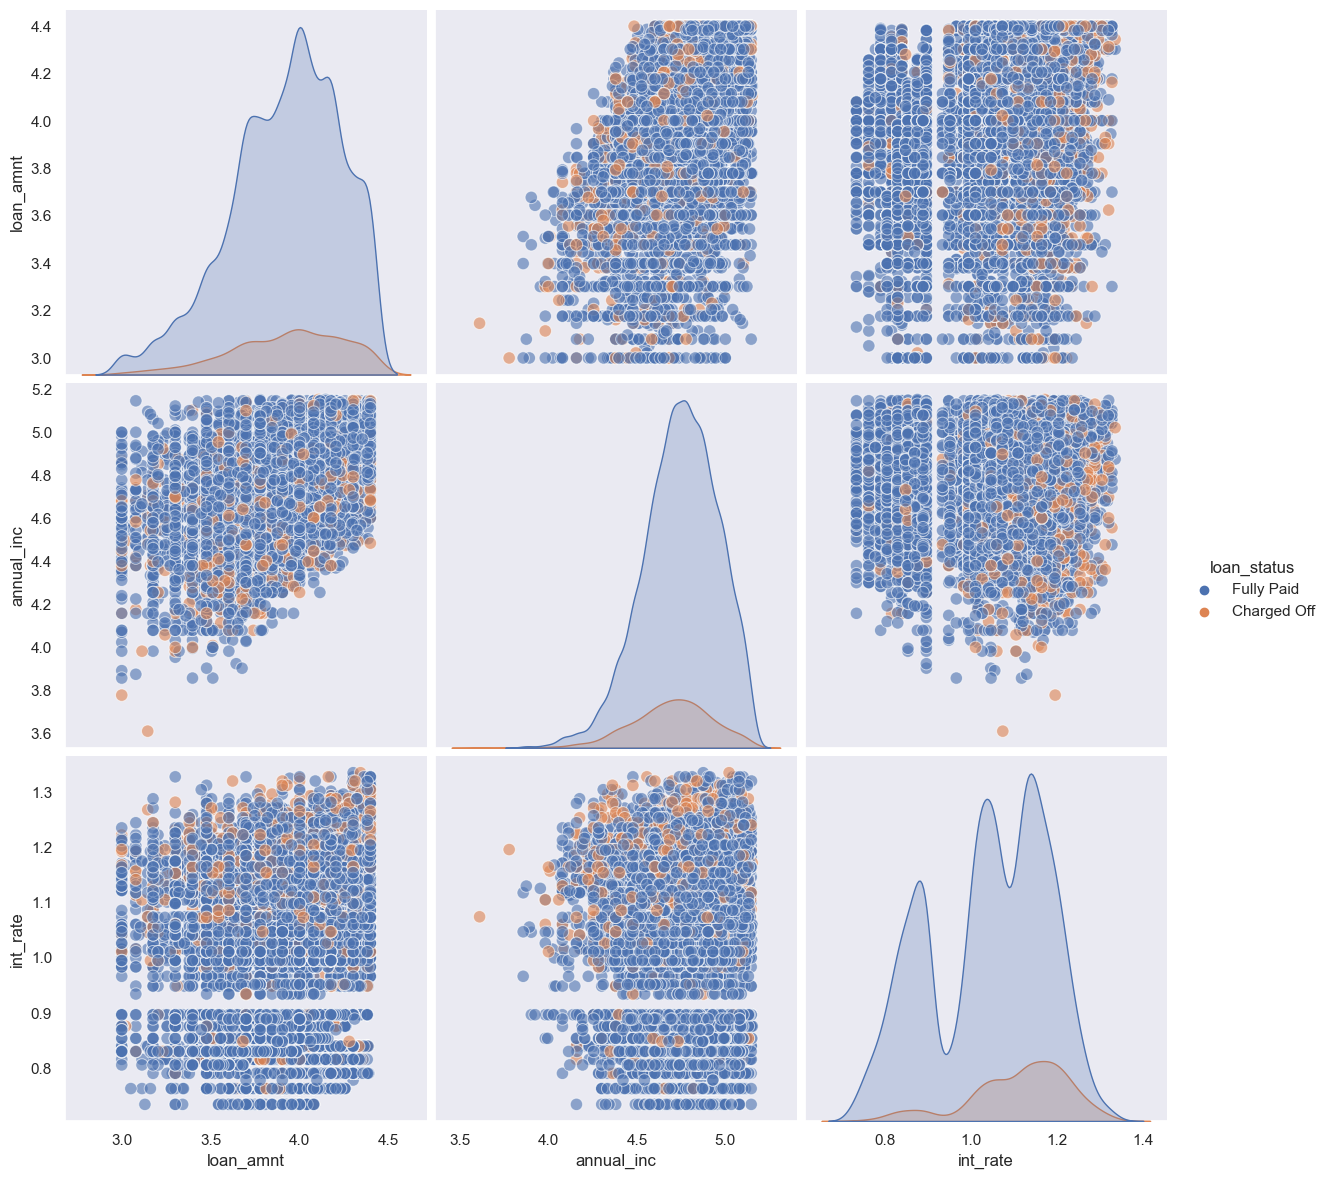

In [1470]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.
# Above plot is too dense so just pick year 2010 for getting some insights.

sns.pairplot(loan_pair[loan_pair['issue_d'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80},
             size = 4);

#### Observation:
1. Higher the interest rate higher charged off ratio
2. Higher the annual income higher the loan amount slightly
3. Intrest rate is increasing with loan amount increase this results in high charged off.